# Personal Information
Name: **DIMITRIOS TSIAMOURAS**

StudentID: **14896184**

Email: [**dimitrios.tsiamouras@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **20.03.2024**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

For the purposes of my Thesis I will utilize 3 datasets. These are all publically available, benchmark datasets that have been repeatedly used in HAR contexts. For that reason, and given that I am investigating the bias introduced by Data Segmentation *specifically*, they are ideal for the purposes of my research. These datasets are all available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/).

Namely, the datasets are: 1) [PAMAP2](https://archive.ics.uci.edu/dataset/231/pamap2+physical+activity+monitoring), 2) [MHEALTH](https://archive.ics.uci.edu/dataset/319/mhealth+dataset) and 3) [UCI-HAR](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones).

1) PAMAP2: it comprises of data from 3 wireless IMUs placed on the wrist, chest, and ankle (all with a sampling frequency of 100Hz), alongside a BM-CS5SR HR-monitor and a Viliv S5 companion. 9 subjects performed 12 prescribed and some additional optional everyday, household and sport activities. The dataset spans over 10 hours and is declared to contain missing data due to various reasons. Each file is labeled per subject and contains timestamped sensory measurements.

2) MHEALTH: consists of body motion and vital signs recordings from 10 volunteers on 12 physical activities using Shimmer2 wearable sensors. Sensors were placed on the chest, right wrist, and left ankle, capturing data at  50Hz.  Each subject's data is stored in separate files, with columns representing sensor readings and activity labels.

3) UCI-HAR: involves 30 volunteers aged 19-48 performing six activities while wearing a smartphone on their waist. The smartphone's accelerometer and gyroscope captured 3-axial linear acceleration and angular velocity at 50Hz. The dataset comes partitioned into training and test sets and includes a 561-feature vector derived from time and frequency domain variables. It comes preprocessed with noise filtering and windowing, its features normalized and bounded within [-1,1]. 

# Data Description

#### 1)  PAMAP2: 
    
    
     After ingesting the files, the resultig dataset contains 43 columns representing features, including data from 9 subjects and for 12 activities. As mentioned in the Readme file, columns tagged as Orientation-labeled are to be removed. A subsequent examination of the heart-rate column reveals 1,792,233 missing values, which needs addressing. Missing values are replaced with the mean value corresponding to the respective activity.

    I initiate my analysis by focusing on the distribution of samples per subject and activity. It becomes clear by the resulting plots that Subject 109 is an outlier, with a mere 6,391 samples. Subject 105 is on the other end of the spectrum, exhibiting the highest count with 272,442 samples, while the remaining subjects hover around an average of 242,060 samples. Analysis of sample counts per activity highlights transient activity (coded with 0) as an outlier. Excluding transient activity, the dataset encompasses approximately 161,906 samples across other activities. Consistent with the guidelines in the Readme file, records pertaining to transient activities are subsequently dropped. 
    
<div style="display: flex;">
    <img src="1.png" width="300"/>
    <img src="2.png" width="700"/>
</div>

    Following preprocessing, the distribution of samples per subject and activity is visualized. Notably, Subject 101 stands out marginally due to a dissimilar sample distribution compared to other subjects. Subject 101 exhibits the highest count for "lying", whereas other subjects predominantly feature "walking". However, this discrepancy is deemed non-significant and does not warrant further action.

<img src="3.png" width="400"/>

    Given the uniqueness of the dataset featuring heart-rate and temperature data, its is imperative that I dive          deeper into their distributions and characteristics. Once again, Subject 109 emerges as an outlier, with the highest average heart-rate. After further investigation it is found that subject 109's records are predominantly around "jump roping", a highly demanding activity, which can explain its significantly elevated heart-rate average. The remaining 25% of its samples correspond to trasient activities, which we have already excluded. The distribution of heart-rate values across activities demonstrates an anticipated pattern, with "lying" recording the lowest average and "running" and "rope jumping" recording the highest. The average heart-rate across all activities is 107 beats per minute (bpm), with a standard deviation of 27, signifying substantial variability explained by the rigor of each activity. The third quartile of heart-rate measures at 124 bpm, with recorded minimum and   maximum values of 57 and 202 beats per minute, respectively.
            
<div style="display: flex;">
    <img src="4.png" width="400"/>
    <img src="5.png" width="700"/>
</div>

    Temperature plots reveal Subject 109 as an outlier yet again, registering notably lower temperatures compared to other subjects. Examination of temperature data across activities exposes "running" and "rope jumping" as the most demanding activities, characterized by the lowest average temperatures.
    
<div style="display: flex;">
    <img src="6.png" width="300"/>
    <img src="7.png" width="700"/>
</div>

    Briefly looking into sensor measurements, I investigate the behavior of hand acceleration measurements, chosen       arbitrarily. Notably, the behavior across different subjects exhibits minimal variance, except for Subject 109, which exhibits extreme values across all three axes. Among different activites, there are big variations in the sensor measurements, which in the case of HAR will be a good way of differentiating and distinguishing among different activities, giving the model better predicting power.
    
<div style="display: flex;">
    <img src="8.png" width="300"/>
    <img src="9.png" width="700"/>
</div>  

    Finally, correlation analysis between features and the "Activity" label is conducted to uncover potential collinearities and dependencies. Most notably, features derived from chest sensors exhibit the highest (predominantly negative) correlations with activity labels, with heart-rate exhibiting the highest positive correlation. Examination of inter-feature correlations reveals a strong -and predictable- correlation (>94%) between acceleration data with scale 6 and those with scale 16, suggesting redundancy and potential influence on subsequent modeling due to collinearity. 
    
<div style="display: flex;">
    <img src="69.png" width="400"/>
    <img src="699.png" width="400"/>
</div>

    Last but not least, I categorized activites into groups in order to study the sensor measurements for patterns:
    The categories were:
    - Stationary: lying, sitting, standing, watching tv, computer work
    - Athletic: running, cycling, nordic, soccer, rope jumping
    - Day-to-day: walking, car driving, ascending stairs, descending stairs
    - Housework: vacuum, ironing, cleaning, laundry.

    The resulting plots showed significant similarity among all types, not providing a lot of information. However, as can be observed in the plots, Housework and Day-to-Day activities are more similar to each other compared to Athletic activites. Notice how the hand_acceleration z and y measurements tend to overlap for the first 2 categories, whereas for the third, even though the magnitude of variation does not change, they do not overlap.


<div style="display: flex;">
    <img src="ath.png" width="400"/>
    <img src="hw.png" width="400"/>
    <img src="d2d.png" width="400"/>
</div>

#### 2)  UCI-HAR: 


    Upon dataset ingestion, which includes measurements for 561 features alongside activity label, name, and subject ID, the resulting dataset comprises 564 features with data from 21 subjects across 6 activities. Remarkably, the dataset has no missing values, and feature values come normalized within the range of [-1,1].

    I focus my initial investigation on the distribution of samples per subject and activity. Notably, there are no discernible outliers, with Subject 25 boasting the highest sample count of 409, while Subject 8 records the minimum at 281 samples. The remaining subjects exhibit variability within this range, averaging 350 samples per activity. Activity-wise grouping reveals 1,407 records for "laying" and 986 for "walking downstairs", with an average of 1,225 samples.
    
<div style="display: flex;">
    <img src="11.png" width="500"/>
    <img src="12.png" width="400"/>
</div>

    More analytical investigation of sample distributions per subject and activity shows that "walking downstairs"       consistently records the fewest samples across all subjects, closely followed by "walking upstairs". The predo-         minant activity varies between "laying", "standing", and "walking".

<div style="display: flex;">
    <img src="13.png" width="500"/>
</div>

    Transitioning to feature correlation analysis with activity, the top 10 correlated features manifest negative          correlations. Features such as "f/t-BodyAccJerkentropy-x/y/z" exhibit notably high negative correlations. Delving deeper, statistical tests including Granger Causality and Pearson correlation showcase not only correlation but also causation, suggesting that these features are indeed valuavble for activity classification. Additionally, the boxpot for the magnitude of acceleration demonstrates distinct separation between stationary (sitting, standing, laying) and moving (walking, downstairs, upstairs) activities. However, there is not much separation within these groups, as activities look very similar and can't be further differentiated by means of this singular feature.
    
<div style="display: flex;">
    <img src="15.png" style="width: 400px; height: 200px;"/>
    <img src="14.png" style="width: 400px; height: 300px;"/>
</div>

    Exploration of feature correlations reveals over 1,000 combinations exhibiting pair-wise correlations exceeding 99%. This observation underscores the prevalence of high collinearity among features, which can substantially impede a model's learning ability and skew its predictions..

    Concluding the analysis, scrutiny of "tBodyAccJerk-entropy" acceleration metrics per subject identifies Subjects 5 and 23 as moderate outliers on the y-axis, recording the lowest and highest average acceleration, respectively. Subject 8 stands out on the z-axis. On a per-activity basis, plot lines exhibit smooth trajectories with minimal informative variance.

<div style="display: flex;">
    <img src="16.png" width="500"/>
    <img src="17.png" width="400"/>
</div>

#### 3)  MHEALTH: 
    
    
     After ingesting the files, the resulting dataset features 23 sensor measurements, all of which are non-null, capturing data from 10 subjects engaged in 12 distinct activities.

    Analysis of sample distribution per subject does not reveal notable disparities, with Subject 1 recording 161,280 samples and Subject 6 a low of 98,304 samples. Surprisingly, looking at the sample distribution per activity unveils "no_activity" as the predominant category, boasting an extreme of 872,550 samples, surpassing the next highest category by a magnitude. Namely, the second highest number of 30,720 samples is shared by 8 activities. 
    
<div style="display: flex;">
    <img src="21.png" width="400"/>
    <img src="22.png" width="400"/>
</div>
    
    In an effort to maintain balance in training resources, while also utilizing this category for further differentiation, the "no_activity" category is resampled to 30,720 samples. Refer to the visualizations below depicting the distribution per activity per subject, both pre and post resampling. There is consistency regarding the distribution among activity types and subjects, indicating minimal discrepancy in available samples across different activities among subjects.
    
<div style="display: flex;">
    <img src="23.png" width="400"/>
    <img src="24.png" width="400"/>
</div>

    Exploration of feature correlations unveils the highest correlation among inherently related sensors, such as          gyroscopes for left ankle and right wrist, and ECG signals 1 and 2. However, the correlation coefficients are relatively low, suggesting lesser collinearity compared to the other 2 datasets.
    
<div style="display: flex;">
    <img src="29.png" width="400"/>
</div>

    Chest acceleration emerges as the sensor type demonstrating the strongest correlation with activity type, nota-   bly with z and y sensors exhibiting high differentiating capability. 
    
<div style="display: flex;">
    <img src="27.png" width="400"/>
</div>
    
        Further analysis of chest sensor magnitudes reveals significant separation among most activities along the y-axis. Notably, activities like walking and running display higher median values compared to sitting and standing, with similar activities clustering together, such as running, jogging, and jumping. However, it is expected    that chest sensors alone are not perfect at discriminating between all activities, particularly when it comes to distinguishing dissimilar activities like "no activity" and jogging. This absence of a single feature exhibiting a correlation exceeding 34.3% underscores the necessity for feature combination.
        
<div style="display: flex;">
    <img src="28.png" width="400"/>
</div>
    
    Outliers also present themselves when investigating the average acceleration values for subjects and activities. 
    
    Identification of outliers in acceleration sensor data unveils anomalous readings across various axes for chest, ankle, and wrist sensors. However, these differentiations can be valuable when it comes to investigating one of my Research Questions; namely the one where it is claimed by previous studies that individual variability in the way that different subjects perform the same activities can significantly affect model performance.
    
<div style="display: flex;">
    <img src="25.png" width="400"/>
    <img src="26.png" width="400"/>
</div>

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout# Imports
import os
import re
from pandas.plotting import scatter_matrix
import random

### - Dataset 1: PAMAP2

In [3]:
#functions to load 

#3-axial sensors
def generate_three_IMU(name):    
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

#4-axial sensors
def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    temp = name+'_temperature'
    output = [temp]
    
    acc_16 = name+'_3D_acceleration_16'
    acc_16 = generate_three_IMU(acc_16)
    output.extend(acc_16)
    
    acc_6 = name+'_3D_acceleration_6'
    acc_6 = generate_three_IMU(acc_6)
    output.extend(acc_6)

    gyro = name+'_3D_gyroscope'
    gyro = generate_three_IMU(gyro)
    output.extend(gyro)

    magn = name+'_3D_magnetometer'
    magn = generate_three_IMU(magn)
    output.extend(magn)
    
    orien = name+'_4D_orientation'
    orien = generate_four_IMU(orien)
    output.extend(orien)
    return output

def load_IMU():
    output = ['time_stamp', 'activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
    
def load_subjects(root='./pamap2+physical+activity+monitoring/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110): #110
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['subject_id'] = i
        output = pd.concat([output, subject], ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()

In [4]:
nan_count = data['heart_rate'].isna().sum()  # For NaN values

print("Number of NaN values in 'heart_rate' column:", nan_count)

Number of NaN values in 'heart_rate' column: 2610265


In [5]:
#data.info()
data.head(5)

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


### Preprocess data by:
1) Removing the "Orientation" columns (described as invalid in the Readme)

In [6]:
data = data.drop(['hand_4D_orientation_x', 'hand_4D_orientation_y', 
                  'hand_4D_orientation_z', 'hand_4D_orientation_w',
                'chest_4D_orientation_x', 'chest_4D_orientation_y', 
                  'chest_4D_orientation_z', 'chest_4D_orientation_w',
                'ankle_4D_orientation_x', 'ankle_4D_orientation_y', 
                  'ankle_4D_orientation_z', 'ankle_4D_orientation_w'],
        axis = 1) 

2) Removing activity_id 0
3) Fill NaN heartrate with column mean

In [7]:
def fix_data(data):
    data = data.drop(data[data['activity_id']==0].index)
    data = data.interpolate()
    for colName in data.columns:
        data[colName] = data[colName].fillna(data[colName].mean())
    activity_mean = data.groupby(['activity_id']).mean().reset_index()
    return data

df_pamap = fix_data(data)
#df_pamap

#### Some Dataset stats

In [8]:
print('Df shape', df_pamap.shape)
print('Total columns', len(df_pamap.columns))
print('No of subjects', len(df_pamap.groupby(['subject_id']).mean().reset_index()))
print('No of total activities',len(df_pamap.groupby(['activity_id']).mean().reset_index()))

Df shape (1942872, 43)
Total columns 43
No of subjects 9
No of total activities 12


#### Subject distribution - can be used in Data Segmentation/Hypotheses etc

In [9]:
#function to facilitate fast plots

def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b])
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.show()

C:\Users\dimts\AppData\Local\Temp\ipykernel_6972\696518533.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


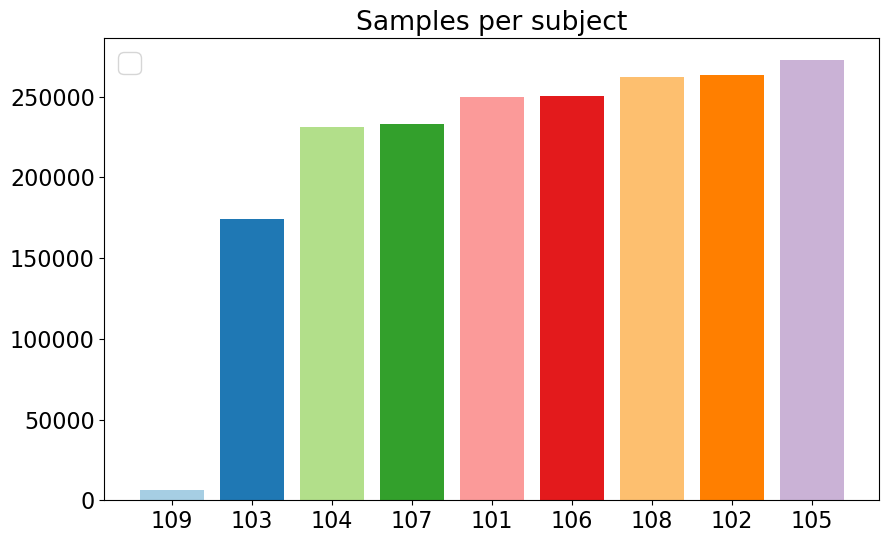

In [10]:
samples = df_pamap.groupby(['subject_id']).count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['subject_id'] = samples['subject_id']
samples_to_subject['samples'] = samples['time_stamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])
pd_fast_plot(samples_to_subject,'samples','subject_id','Samples per subject')

In [11]:
subject_counts = df_pamap['subject_id'].value_counts()

max_subject = subject_counts.idxmax()
max_count = subject_counts.max()
print(f"Subject {max_subject} has {max_count}")

min_subject = subject_counts.idxmin()
min_count = subject_counts.min()
print(f"Subject {min_subject} has {min_count}")

Subject 105 has 272442
Subject 109 has 6391


In [12]:
filter = df_pamap[df_pamap['subject_id'] != 109]
samples = filter.groupby(['subject_id']).count().reset_index()
mean_samples_per_subject = samples['time_stamp'].mean()
print("Avg samples per subject: ", mean_samples_per_subject)

Avg samples per subject:  242060.125


#### Activity distribution

In [13]:
def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map

map_ac = load_activity_map()

C:\Users\dimts\AppData\Local\Temp\ipykernel_6972\696518533.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


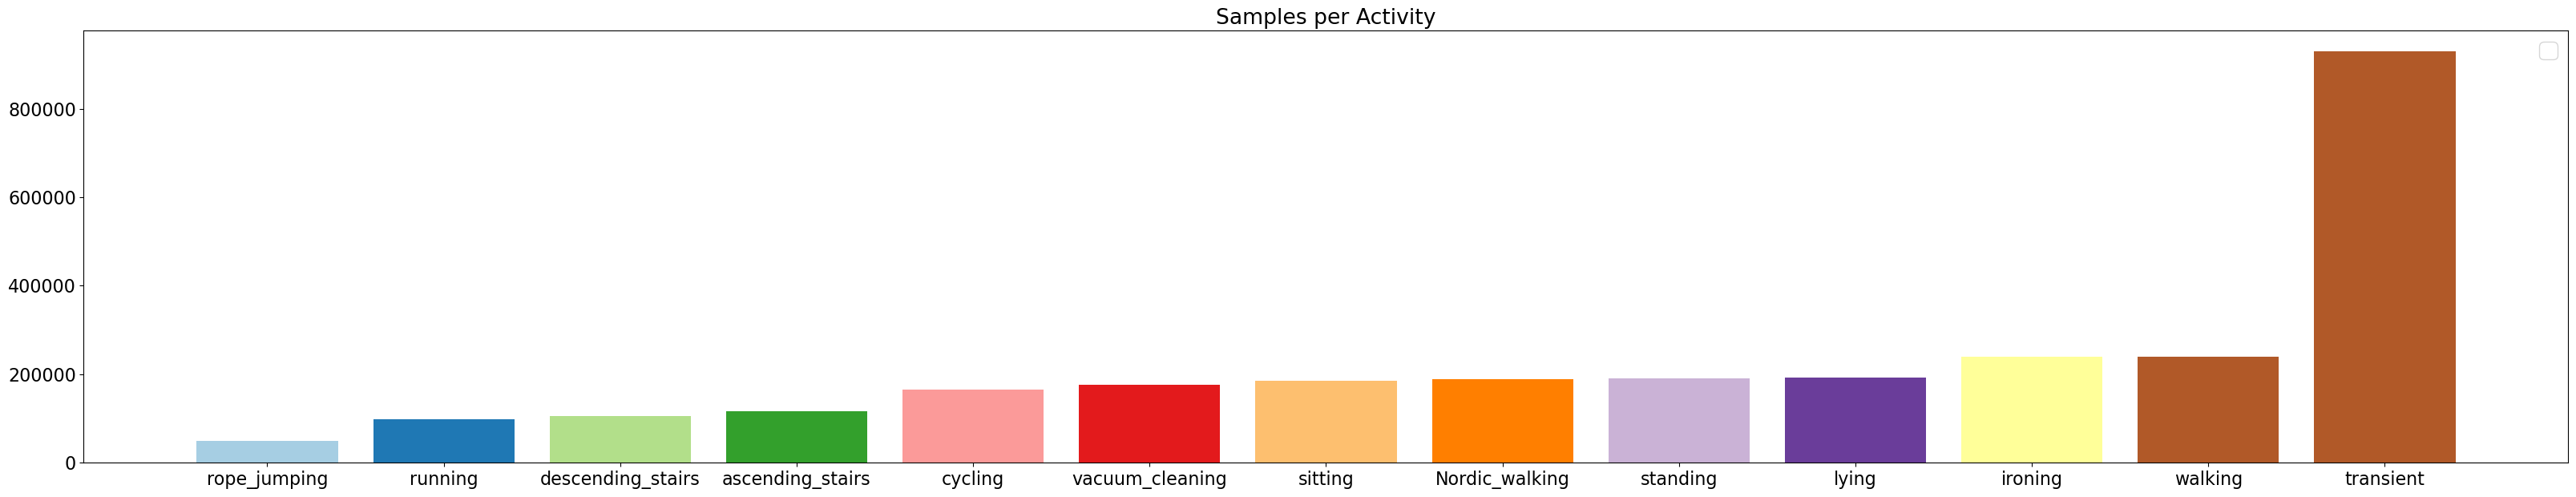

In [14]:
samples = data.groupby(['activity_id']).count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['activity'] = [map_ac[x] for x in samples['activity_id']]
samples_to_subject['samples'] = samples['time_stamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])
pd_fast_plot(samples_to_subject,'samples','activity','Samples per Activity',figsize=(40,7))

In [15]:
filter = data[data['activity_id'] != 0]
samples = filter.groupby(['activity_id']).count().reset_index()
mean_samples_per_activity = samples['time_stamp'].mean()
print("Avg samples per subject: ", mean_samples_per_activity)

Avg samples per subject:  161906.0


#### Visual Representation of Activities per Subject

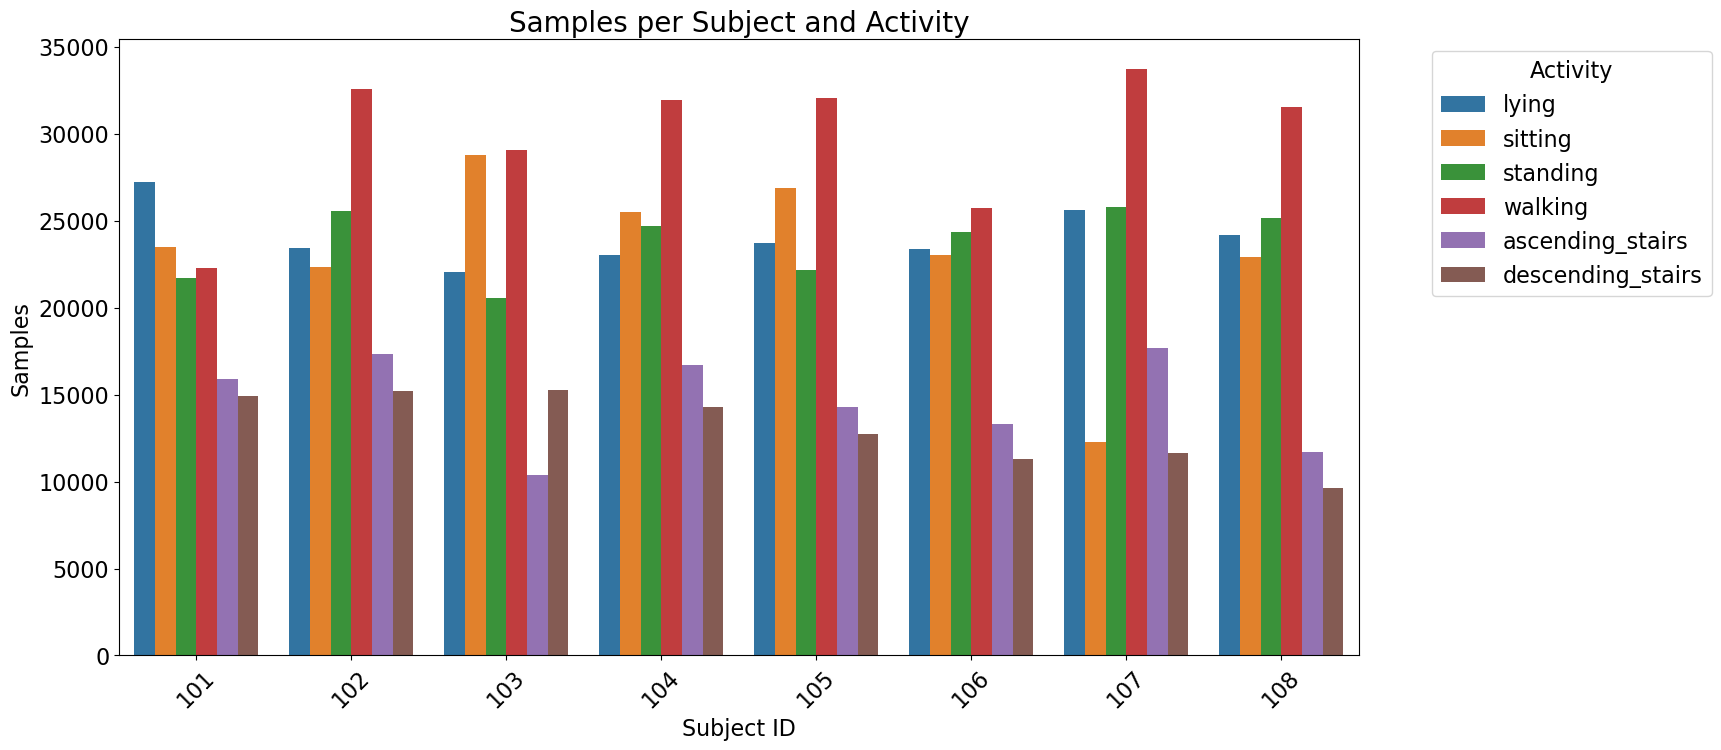

In [16]:
user_activity_counts = data.groupby(['subject_id', 'activity_id']).size().reset_index(name='samples')

user_activity_counts['activity'] = user_activity_counts['activity_id'].map(map_ac)

activities = ['standing', 'walking', 'sitting', 'lying', 'descending_stairs', 'ascending_stairs']
user_activity_counts = user_activity_counts[user_activity_counts['activity'].isin(activities)]

plt.figure(figsize=(16, 8))
plt.title('Samples per Subject and Activity', fontsize=20)
sns.barplot(x='subject_id', y='samples', hue='activity', data=user_activity_counts)
plt.xlabel('Subject ID')
plt.ylabel('Samples')
plt.xticks(rotation=45)
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Heart-rate per subject and per activity

In [17]:
subject_109_data = data[data['subject_id'] == 109]
activity_counts = subject_109_data.groupby('activity_id').size()
print(activity_counts)

activity_id
0     2086
24    6391
dtype: int64


C:\Users\dimts\AppData\Local\Temp\ipykernel_6972\696518533.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


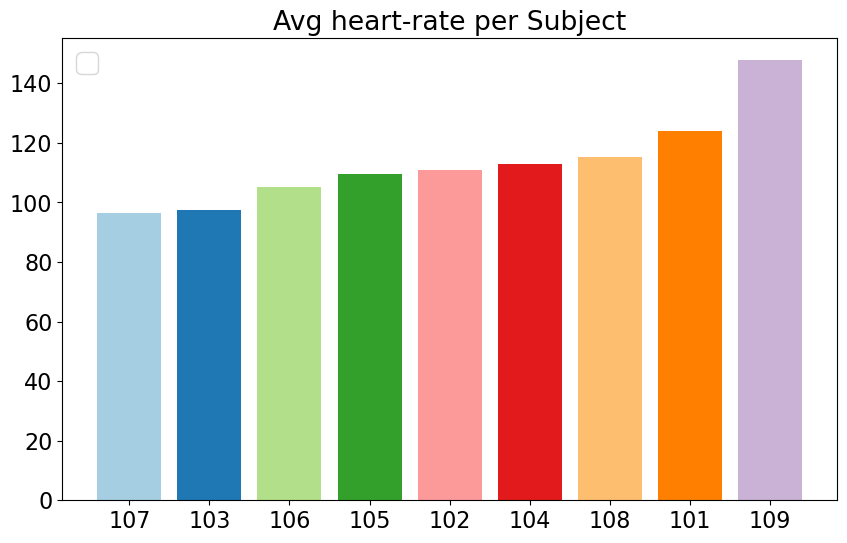

In [18]:
#per Subject

result_id = data.groupby(['subject_id']).mean().reset_index()
samples_heart_rate = pd.DataFrame()
samples_heart_rate['subject_id'] = result_id['subject_id']
samples_heart_rate['heart_rate'] = result_id['heart_rate']
samples_heart_rate = samples_heart_rate.sort_values(by=['heart_rate'])
pd_fast_plot(samples_heart_rate,'heart_rate','subject_id','Avg heart-rate per Subject')

C:\Users\dimts\AppData\Local\Temp\ipykernel_6972\696518533.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


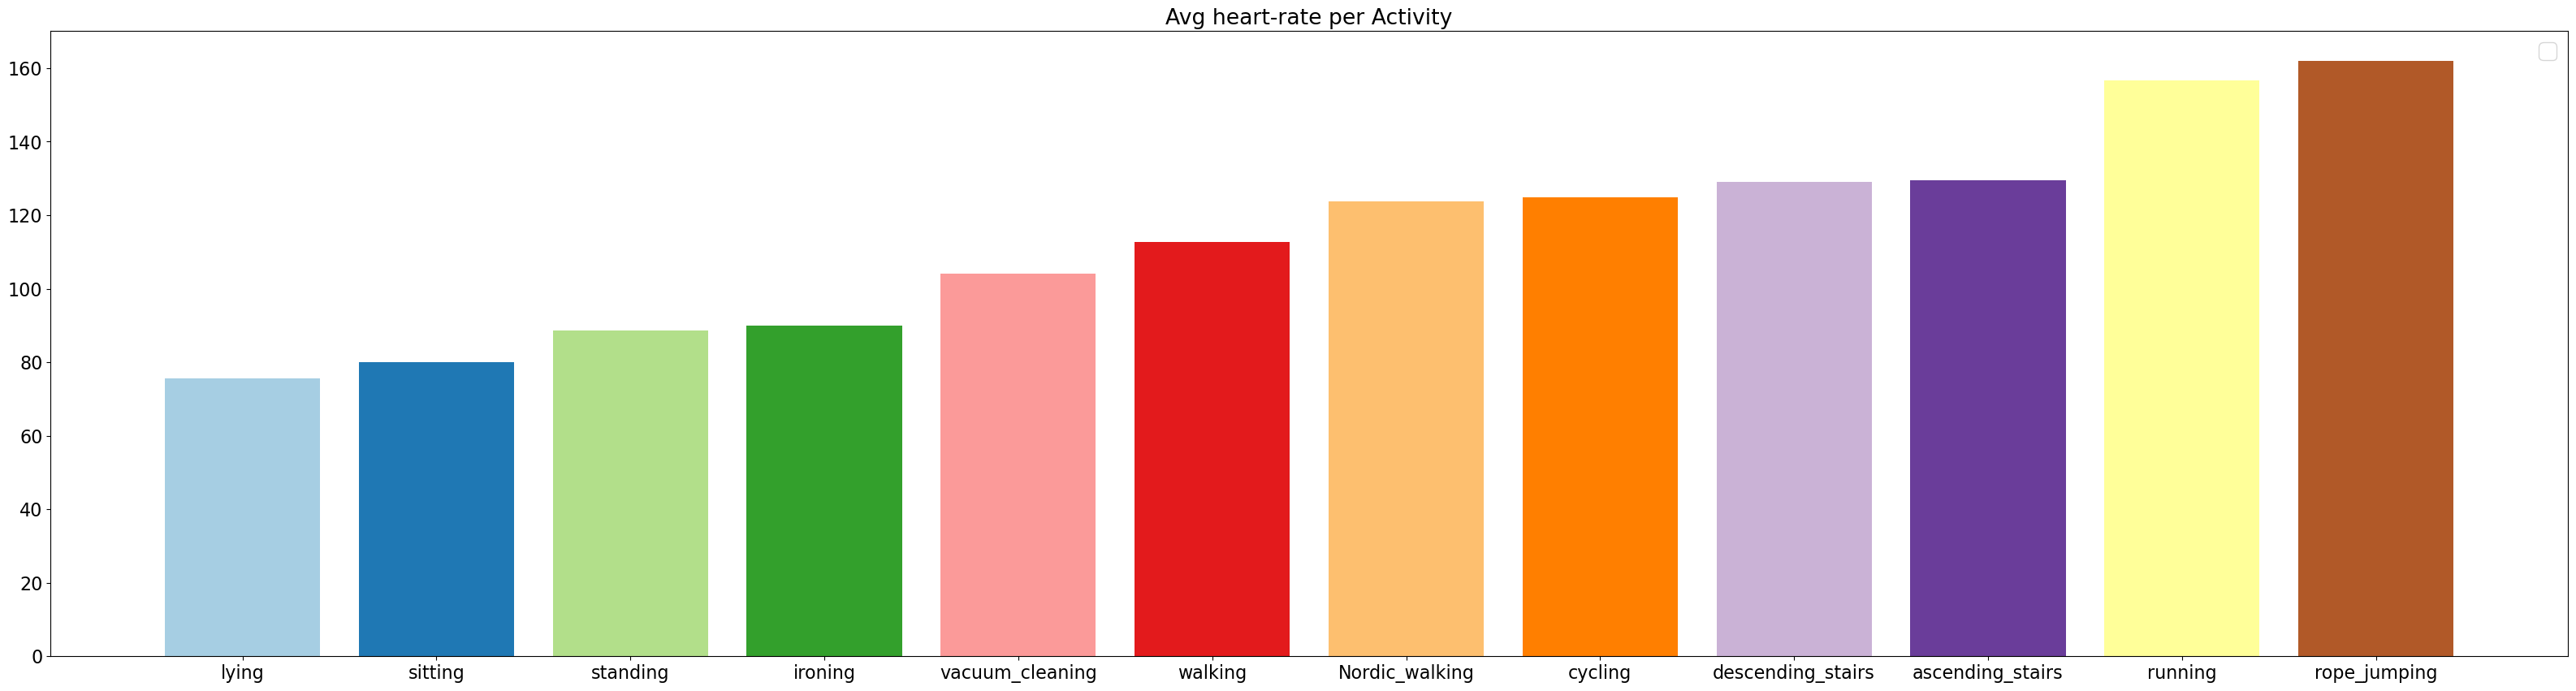

In [19]:
activity_mean = df_pamap.groupby(['activity_id']).mean().reset_index()
samples_heart_rate = pd.DataFrame()
samples_heart_rate['activity'] = [map_ac[x] for x in activity_mean['activity_id']]
samples_heart_rate['heart_rate'] = activity_mean['heart_rate']
samples_heart_rate = samples_heart_rate.sort_values(by=['heart_rate'])
pd_fast_plot(samples_heart_rate,'heart_rate','activity','Avg heart-rate per Activity',figsize=(40,10))

#### Heart-rate outliers

count    1.942872e+06
mean     1.074879e+02
std      2.699215e+01
min      5.700000e+01
25%      8.600000e+01
50%      1.040000e+02
75%      1.240000e+02
max      2.020000e+02
Name: heart_rate, dtype: float64


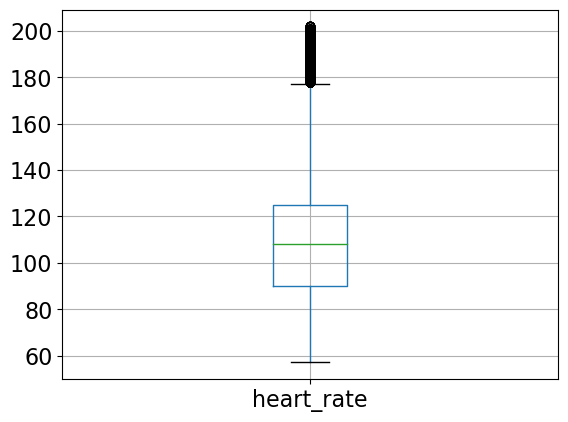

In [20]:
stats = df_pamap['heart_rate'].describe()
print(stats)

data.boxplot(column='heart_rate')
plt.show()

#### Temperature Analysis

C:\Users\dimts\AppData\Local\Temp\ipykernel_6972\3277357025.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


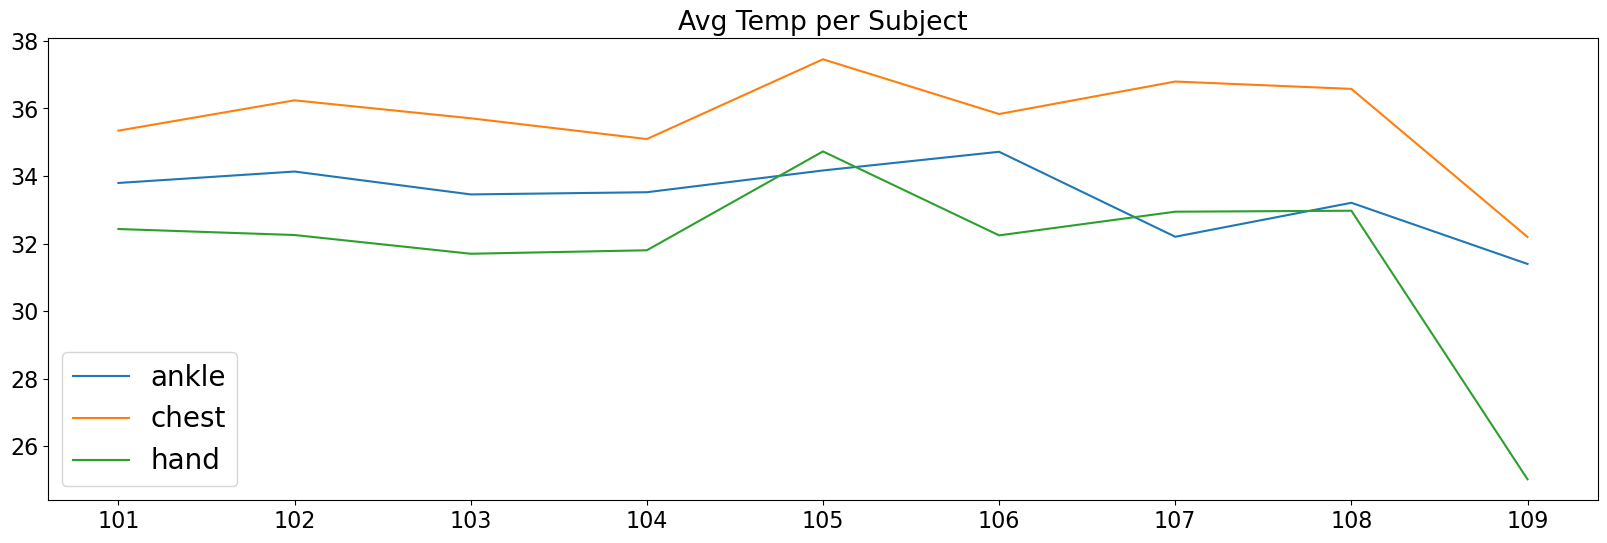

In [21]:
#per Subject

samples_temperature = pd.DataFrame()
samples_temperature['ankle'] = result_id['ankle_temperature']
samples_temperature['chest'] = result_id['chest_temperature']
samples_temperature['hand'] = result_id['hand_temperature']

ax = samples_temperature.plot(kind='line', figsize=(20,6), title='Avg Temp per Subject')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples_temperature)))

C:\Users\dimts\AppData\Local\Temp\ipykernel_6972\1776789781.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(samples_temperature['activity'])


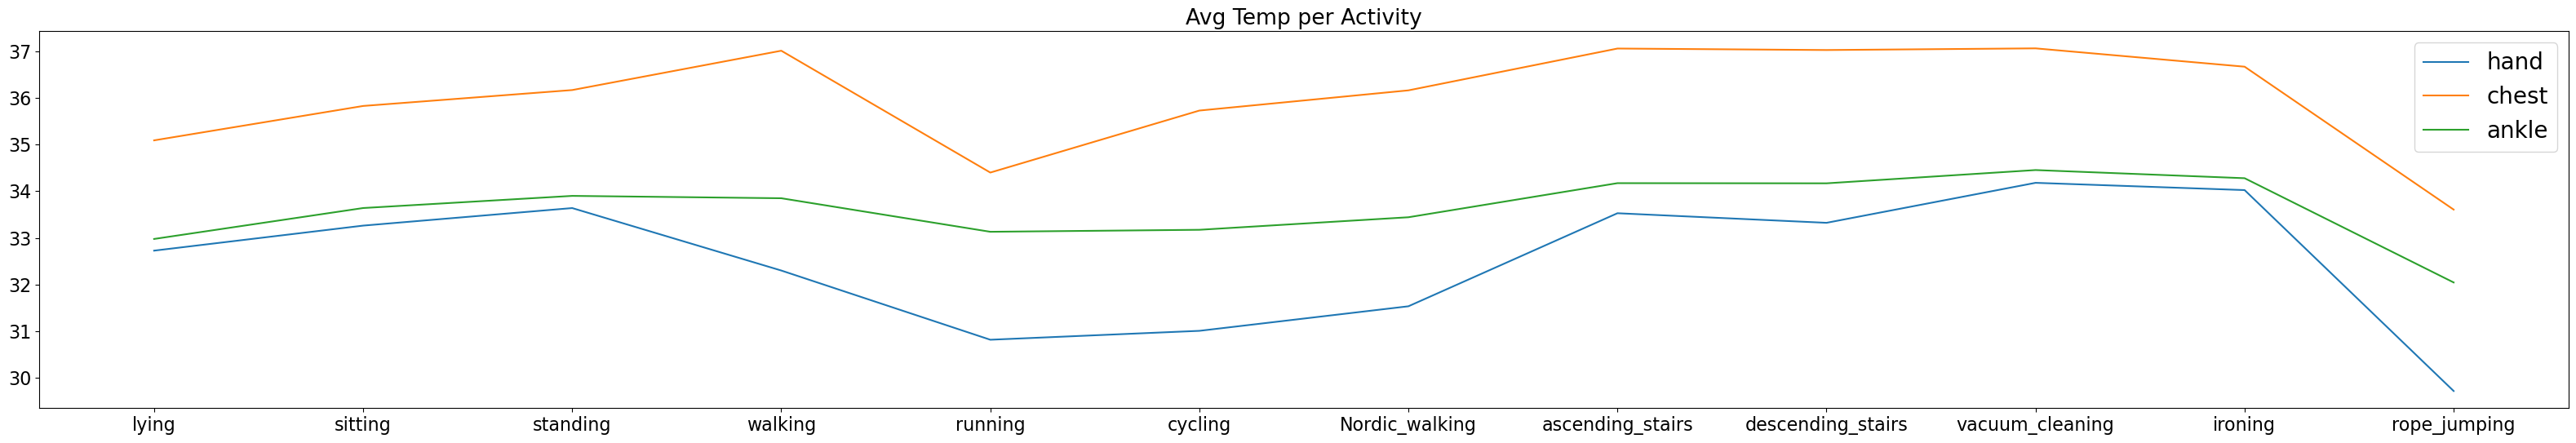

In [22]:
#per activity

samples_temperature = pd.DataFrame()
samples_temperature['activity'] = [map_ac[x] for x in activity_mean['activity_id']]
samples_temperature['hand'] = activity_mean['hand_temperature']
samples_temperature['chest'] = activity_mean['chest_temperature']
samples_temperature['ankle'] = activity_mean['ankle_temperature']

ax = samples_temperature.plot(kind='line', figsize=(40,6), title='Avg Temp per Activity')
a = ax.set_xticklabels(samples_temperature['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples_temperature)))

#### Acceleration Analysis

C:\Users\dimts\AppData\Local\Temp\ipykernel_6972\4287197847.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


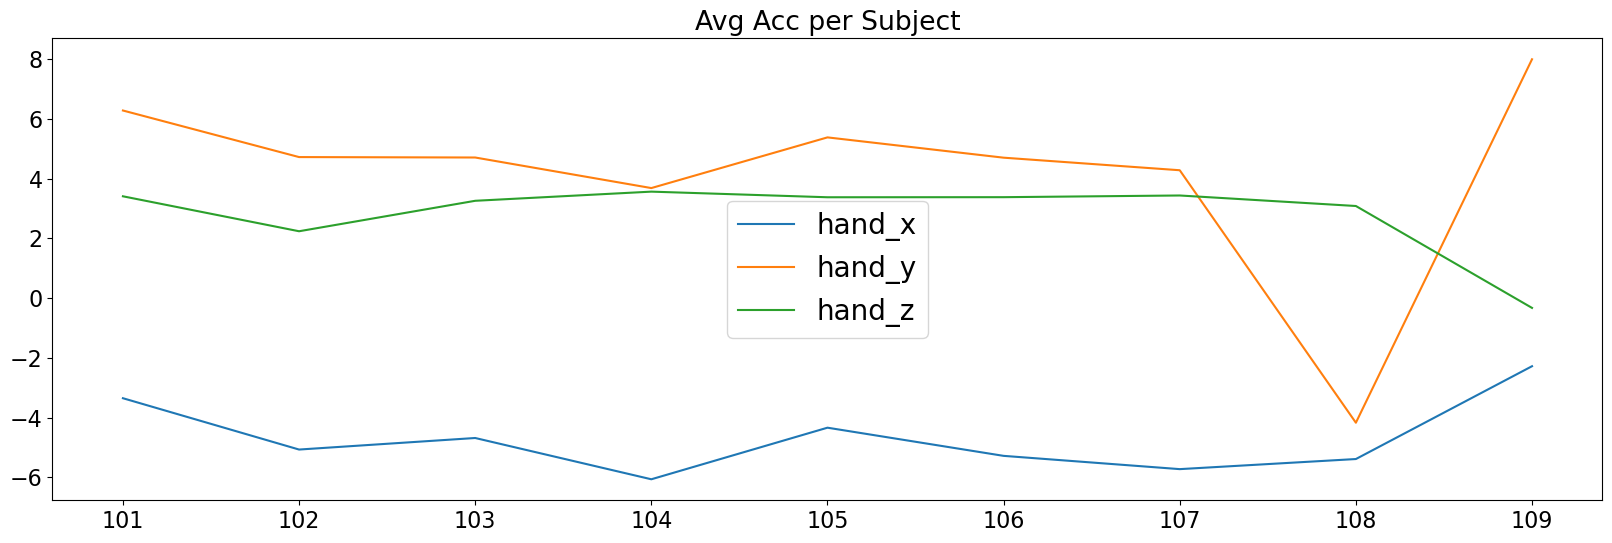

In [23]:
result_id = data.groupby(['subject_id']).mean().reset_index()
samples = pd.DataFrame()
samples['hand_x'] = result_id['hand_3D_acceleration_16_x']
samples['hand_y'] = result_id['hand_3D_acceleration_16_y']
samples['hand_z'] = result_id['hand_3D_acceleration_16_z']
ax = samples.plot(kind='line', figsize=(20,6), title='Avg Acc per Subject')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples)))

C:\Users\dimts\AppData\Local\Temp\ipykernel_6972\1860598985.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(samples_temperature['activity'])


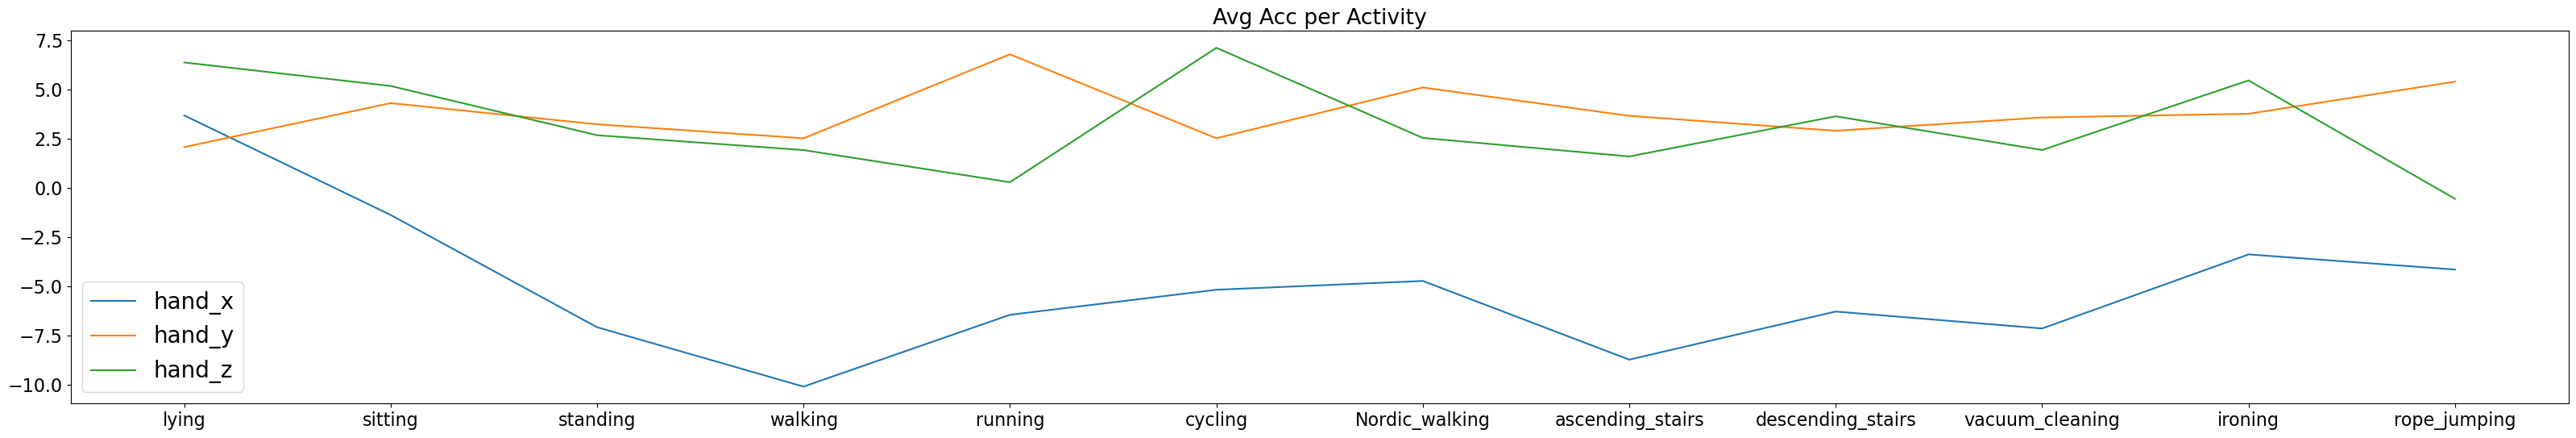

In [24]:
samples_temperature = pd.DataFrame()
samples_temperature['activity'] = [map_ac[x] for x in activity_mean['activity_id']]
samples_temperature['hand_x'] = activity_mean['hand_3D_acceleration_16_x']
samples_temperature['hand_y'] = activity_mean['hand_3D_acceleration_16_y']
samples_temperature['hand_z'] = activity_mean['hand_3D_acceleration_16_z']

ax = samples_temperature.plot(kind='line', figsize=(40,6), title='Avg Acc per Activity')
a = ax.set_xticklabels(samples_temperature['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples_temperature)))

#### Investigating which columns are mostly correlated with Activity
<a id="correlation"></a>

In [25]:
numerical_columns = data.select_dtypes(include='number').columns

correlation_results = {}
for col in numerical_columns:
    correlation_results[col] = data[col].corr(data['activity_id'])

#sort by correlation value
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True)

top_correlated_columns = sorted_correlation_results[1:10]
print("Correlations to Activity:")
for col, corr in top_correlated_columns:
    print(f"{col}: Correlation={corr}")

Correlations to Activity:
chest_3D_acceleration_6_z: Correlation=-0.3102606257223871
chest_3D_acceleration_16_z: Correlation=-0.30885638804442356
hand_temperature: Correlation=0.1515279893066681
chest_3D_magnetometer_z: Correlation=0.14941884975706746
ankle_3D_magnetometer_z: Correlation=0.14939389752595278
chest_3D_magnetometer_y: Correlation=-0.149374582611355
ankle_temperature: Correlation=0.14025226873205637
hand_3D_magnetometer_z: Correlation=-0.13097157646714244
chest_3D_acceleration_16_x: Correlation=-0.12947711564763556


#### Correlation of columns to find collinearities, dependencies etc

In [26]:
df_corr = data.corr()
df_corr = df_corr.drop(['activity_id'], axis = 1)

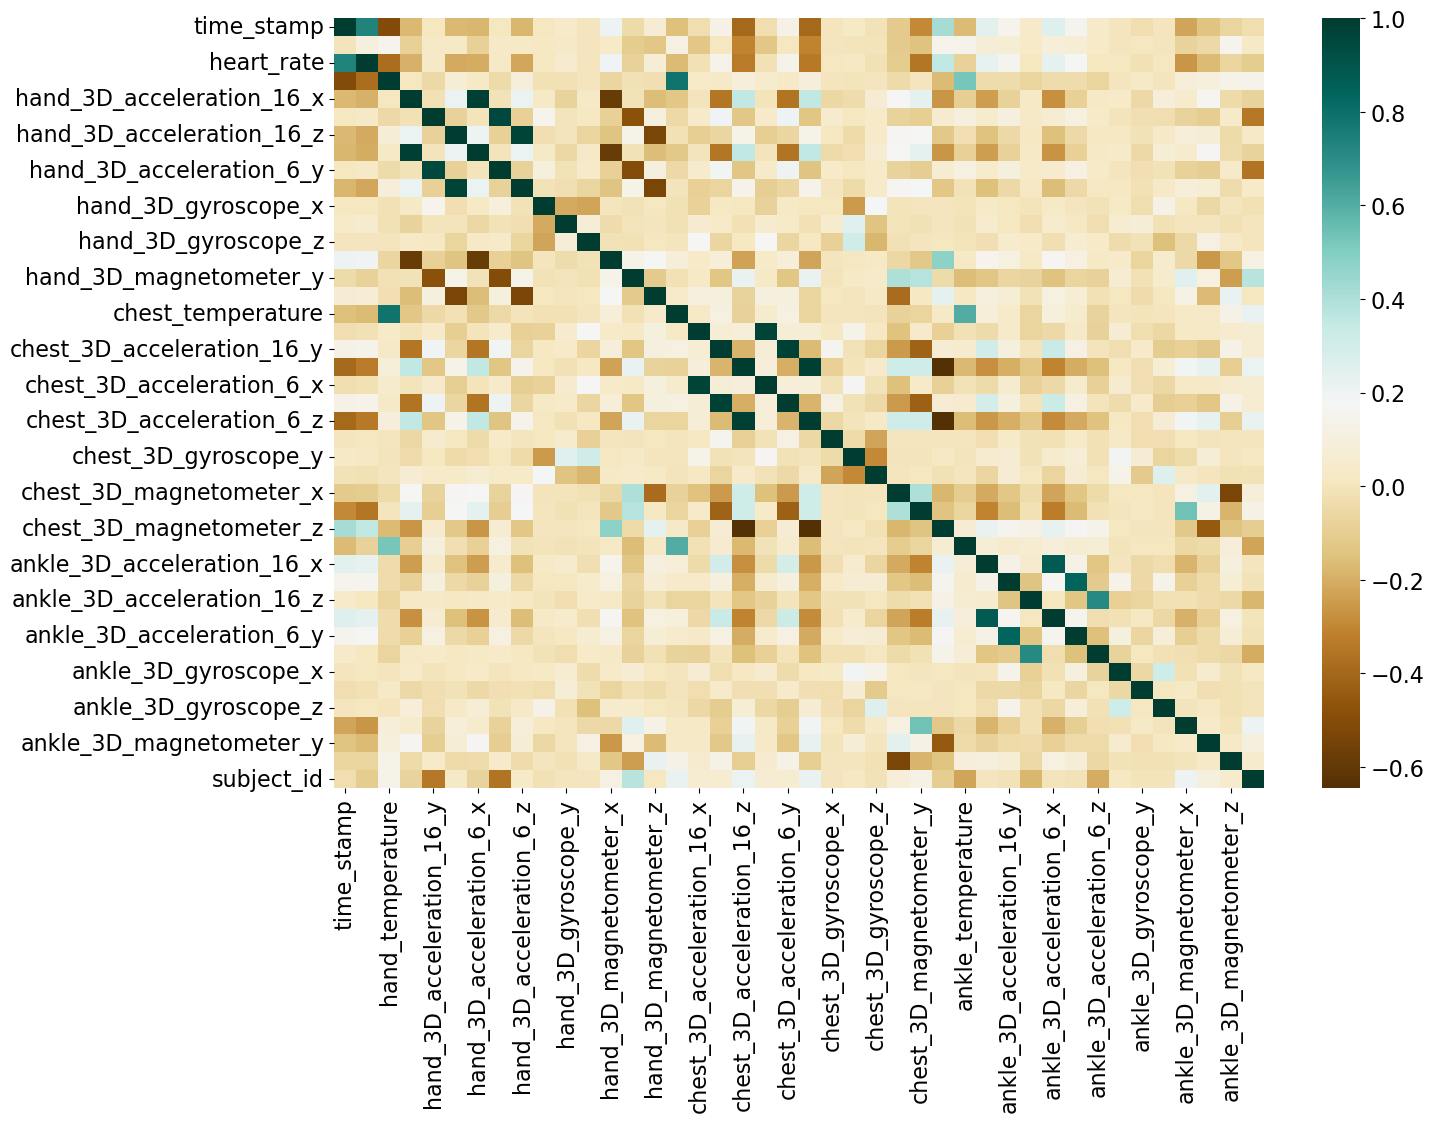

In [27]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()

In [28]:
top_corr_unique = df_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_unique = top_corr_unique[top_corr_unique < 1.0].head(10)

print("Top 10 most correlated features:")
for (feature1, feature2), correlation in top_corr_unique.items():
    print(f"{feature1} and {feature2}: {correlation}")

Top 10 most correlated features:
chest_3D_acceleration_6_z and chest_3D_acceleration_16_z: 0.9855604291747134
hand_3D_acceleration_6_x and hand_3D_acceleration_16_x: 0.9834231647343311
chest_3D_acceleration_16_y and chest_3D_acceleration_6_y: 0.9779280316582625
hand_3D_acceleration_6_z and hand_3D_acceleration_16_z: 0.9718623336200172
chest_3D_acceleration_6_x and chest_3D_acceleration_16_x: 0.9684074751921782
hand_3D_acceleration_6_y and hand_3D_acceleration_16_y: 0.953431236180471
ankle_3D_acceleration_6_x and ankle_3D_acceleration_16_x: 0.8741044812826606
ankle_3D_acceleration_6_y and ankle_3D_acceleration_16_y: 0.8349352481440265
hand_temperature and chest_temperature: 0.7834246549640166
heart_rate and time_stamp: 0.7317963676501765


In [29]:
#mapping activities into: Stationary, Athletic, Day-to-day and Housework

def activity_mapper(activity):
    #stationary
    if(activity in [1,2,3,9,10]):
        return 0
    #athletic
    elif(activity in [5,6,7,20,24]):
        return 1
    #d2d
    elif(activity in [4,11,12,13]):
        return 2
    #housework
    elif(activity in [16,17,19,18]):
        return 3
    
data['activity_category'] = data['activity_id'].apply(activity_mapper)

In [30]:
activity_counts = data['activity_category'].value_counts()
print(activity_counts)

activity_category
0.0    567642
1.0    500266
2.0    460921
3.0    414043
Name: count, dtype: int64


In [55]:
import matplotlib.pyplot as plt

def plot_activity(activity, df):
    data = df[df['activity_category'] == activity][['hand_3D_acceleration_16_x', 'hand_3D_acceleration_16_y', 'hand_3D_acceleration_16_z','ankle_3D_acceleration_6_x','ankle_3D_acceleration_6_y','ankle_3D_acceleration_6_z']][:100]
    plt.rcParams["figure.figsize"] = (5,3)
    axis = data.plot(subplots=False, figsize=(16, 12), title=activity)
    plt.title("Athletic Activities")
    plt.show()


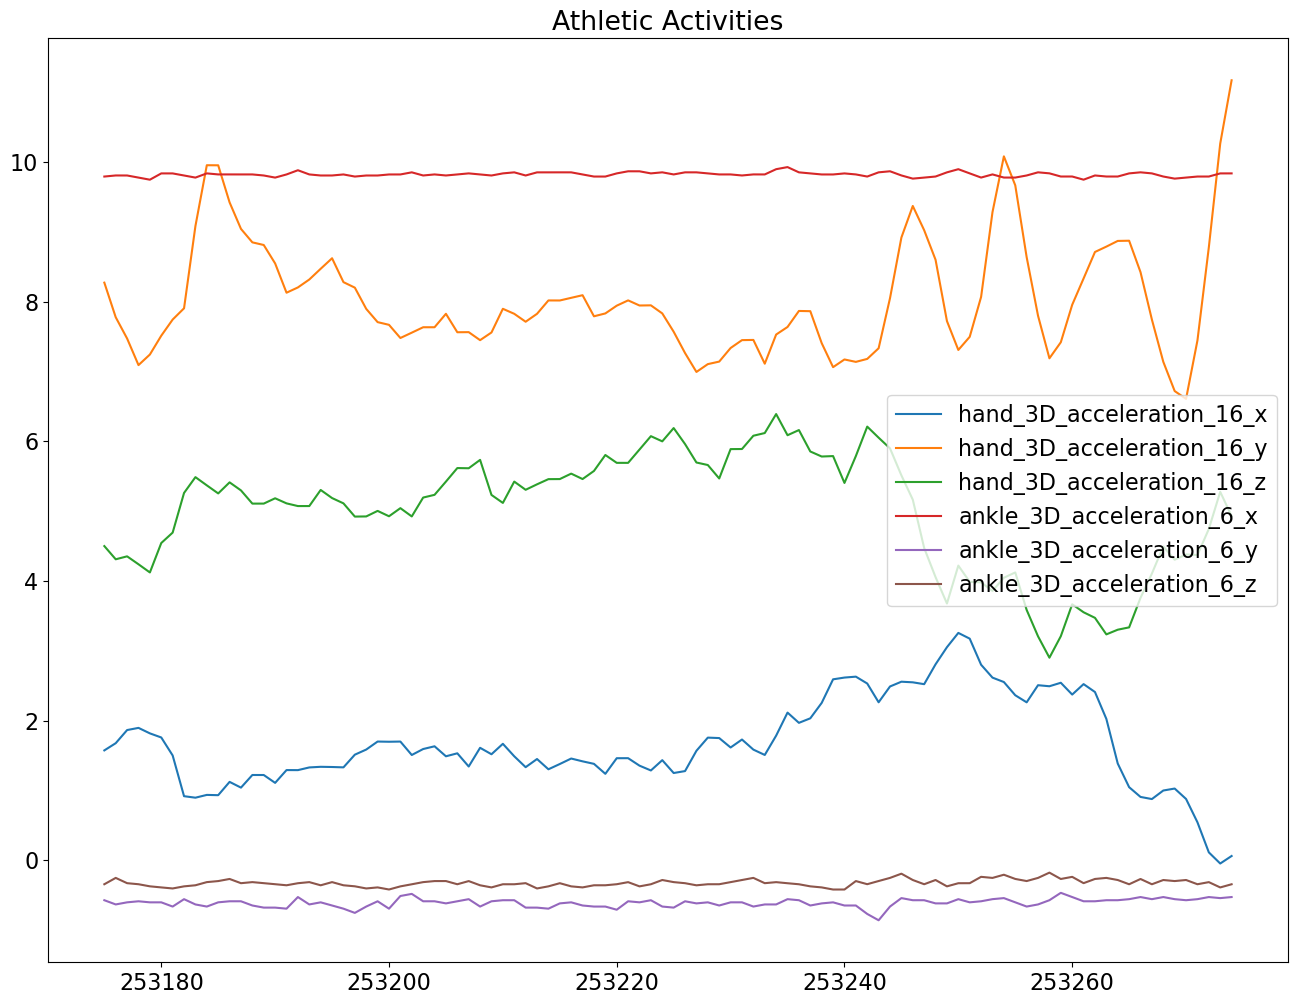

In [56]:
plot_activity(1, data)

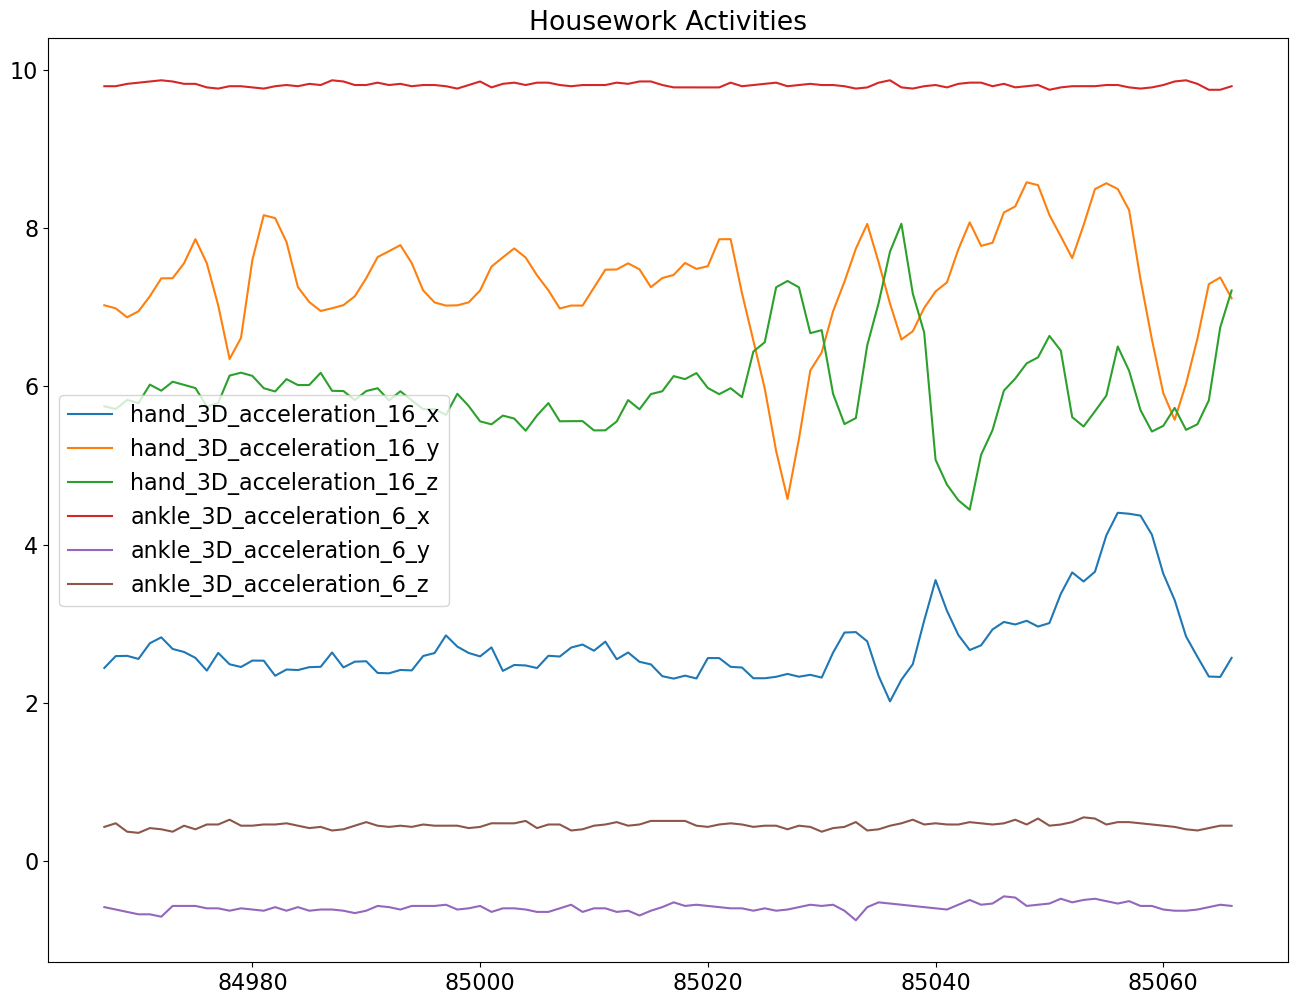

In [53]:
plot_activity(3, data)

### - Dataset 2: UCI-HAR

In [73]:
#begin by loading the features
path = './human+activity+recognition+using+smartphones/UCI HAR Dataset/'

features = list()
with open(path + 'features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

seen = set()
uniq_features = []
for idx, x in enumerate(features):
    if x not in seen:
        uniq_features.append(x)
        seen.add(x)
    elif x + 'n' not in seen:
        uniq_features.append(x + 'n')
        seen.add(x + 'n')
    else:
        uniq_features.append(x + 'nn')
        seen.add(x + 'nn')
len(uniq_features)

561

In [74]:
#train data

X_train = pd.read_csv(path + 'train/X_train.txt', delim_whitespace=True, header=None, names=uniq_features)

# # add subject column to the dataframe
X_train['subject_id'] = pd.read_csv(path + 'train/subject_train.txt', header=None)

y_train = pd.read_csv(path + 'train/y_train.txt', names=['activity_id'])
activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', \
                    4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
y_train_labels = y_train.replace({'activity_id': activity_mapping})

#create final df
train = X_train
train['activity_id'] = y_train
train['activity_name'] = y_train_labels
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity_id,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [75]:
#test data

X_test = pd.read_csv(path + 'test/X_test.txt', delim_whitespace=True, header=None, names=uniq_features)

X_test['subject_id'] = pd.read_csv(path + 'test/subject_test.txt', header=None)

y_test = pd.read_csv(path + 'test/y_test.txt', names=['activity_id'])

activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', \
                    4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
y_test_labels = y_test.replace({'activity_id': activity_mapping})
test = X_test
test['activity_id'] = y_test
test['activity_name'] = y_test_labels
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity_id,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


#### Some Dataset stats

In [76]:
print('Df shape', X_train.shape)
print('Total columns', len(X_train.columns))
print('No of subjects', len(X_train.drop(['activity_name'], axis = 1).groupby(['subject_id']).mean().reset_index()))
print('No of total activities',len(X_train.drop(['activity_name'], axis = 1).groupby(['activity_id']).mean().reset_index()))

Df shape (7352, 564)
Total columns 564
No of subjects 21
No of total activities 6


#### Check for null or NaN values: 
##### In this case there are no such values, so no step to be taken here.

In [60]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


#### Subject distribution - can be used in Data Segmentation/Hypotheses etc

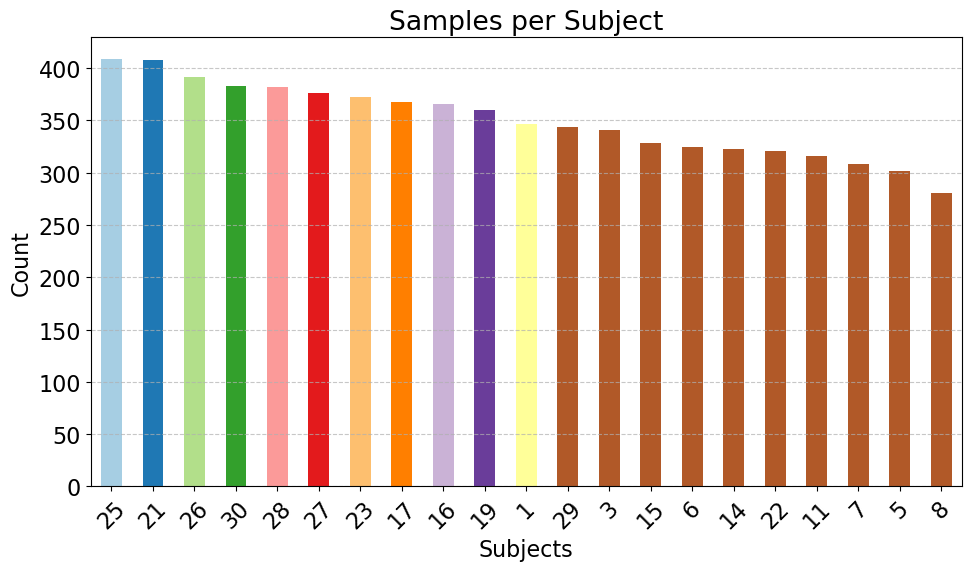

In [78]:
subject_counts = train['subject_id'].value_counts()

num_subjects = len(subject_counts)
colors = plt.cm.Paired(range(num_subjects))
plt.figure(figsize=(10, 6)) 
subject_counts.plot(kind='bar', color=colors) 
plt.title('Samples per Subject')
plt.xlabel('Subjects')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

In [79]:
max_subject = subject_counts.idxmax()
max_count = subject_counts.max()
print(f"Subject {max_subject} has {max_count}")

min_subject = subject_counts.idxmin()
min_count = subject_counts.min()
print(f"Subject {min_subject} has {min_count}")

Subject 25 has 409
Subject 8 has 281


In [67]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject_id',
       'activity_id', 'activity_name'],
      dtype='object', length=564)

In [81]:
rows_per_subj = train.groupby('subject_id').size()
avg_rows = rows_per_subj.mean()
print("Average number of rows per subject:", avg_rows)

Average number of rows per subject: 350.0952380952381


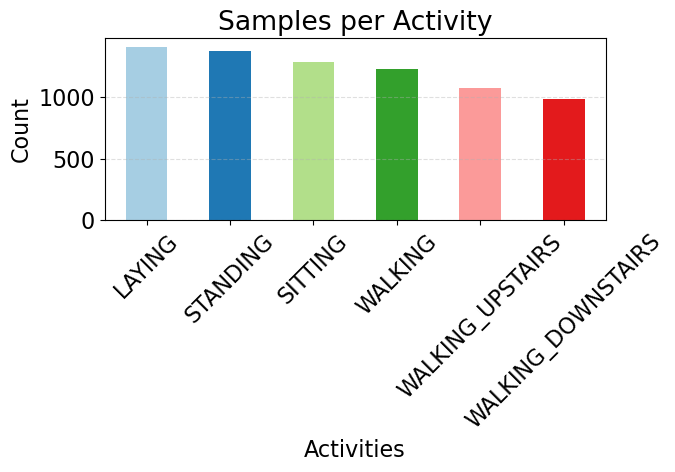

In [82]:
#the same for activities

activity_counts = train['activity_id'].map(activity_mapping).value_counts()

num_activities = len(activity_counts)
colors = plt.cm.Paired(range(num_activities))

plt.figure(figsize=(7, 5))
activity_counts.plot(kind='bar', color=colors)
plt.title('Samples per Activity')
plt.xlabel('Activities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [84]:
max_act = activity_counts.idxmax()
max_count = activity_counts.max()
print(f"{max_act} has {max_count} samples")

min_act = activity_counts.idxmin()
min_count = activity_counts.min()
print(f"{min_act} has {min_count} samples")

rows_per_subj = train.groupby('activity_id').size()
avg_rows = rows_per_subj.mean()
print("Average number of rows per subject:", avg_rows)

LAYING has 1407 samples
WALKING_DOWNSTAIRS has 986 samples
Average number of rows per subject: 1225.3333333333333


#### Visual Representation of Activities per Subject

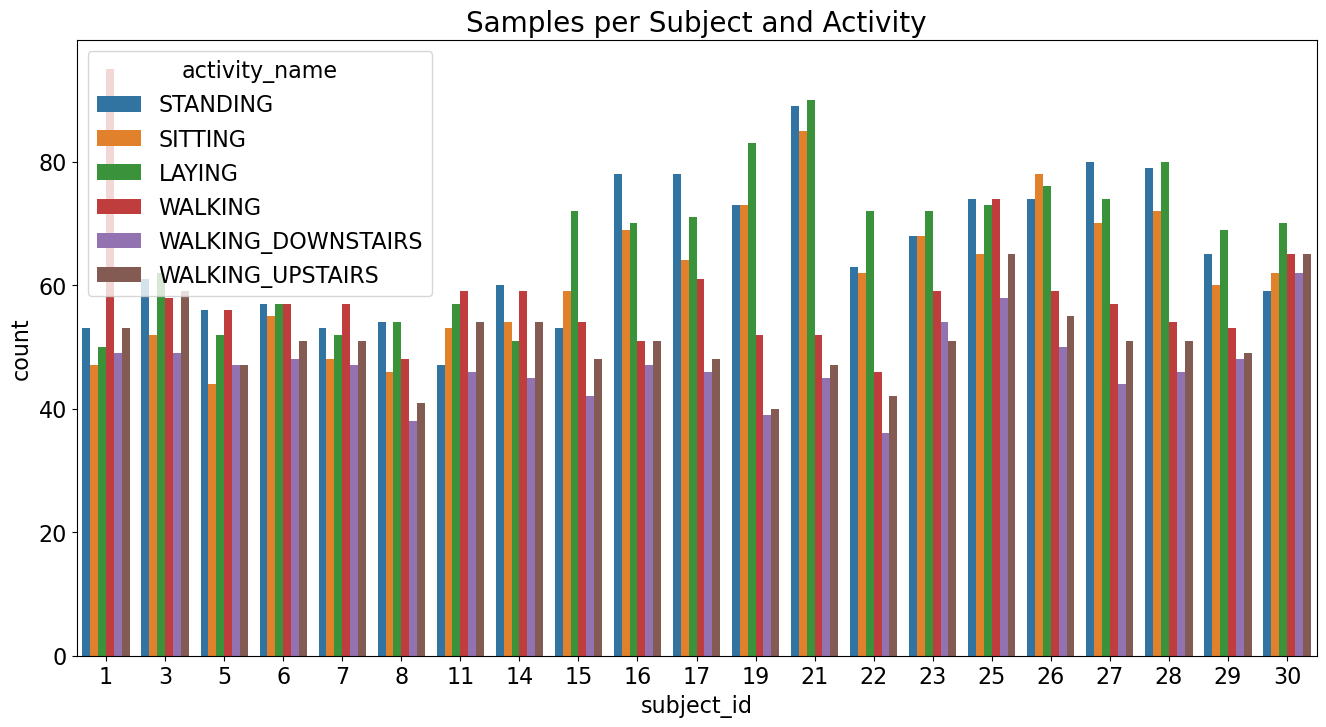

In [85]:
plt.figure(figsize=(16,8))
plt.title('Samples per Subject and Activity', fontsize=20)
sns.countplot(x='subject_id',hue='activity_name', data = train)
plt.show()

#### Investigating which columns are mostly correlated with Activity

In [87]:
numerical_columns = train.select_dtypes(include='number').columns

correlation_results = {}
for col in numerical_columns:
    correlation_results[col] = train[col].corr(train['activity_id'])

#sort by correlation value
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True)

top_correlated_columns = sorted_correlation_results[1:11]  # Adjust the number of top correlated columns to display
for col, corr in top_correlated_columns:
    print(f"{col}: Correlation={corr}")

tBodyAccJerk-entropy()-Z: Correlation=-0.8594497443839431
tBodyAccJerk-entropy()-X: Correlation=-0.8574540170931816
fBodyAccJerk-entropy()-Y: Correlation=-0.853579233347466
tBodyAccJerk-entropy()-Y: Correlation=-0.8534249800667506
tBodyAccJerkMag-entropy(): Correlation=-0.8476506009428085
fBodyAccJerk-entropy()-X: Correlation=-0.8446601155254597
tBodyGyroJerk-entropy()-Z: Correlation=-0.8429344570181492
fBodyAcc-entropy()-Y: Correlation=-0.8398241388912253
fBodyAccJerk-entropy()-Z: Correlation=-0.8323958285505079
fBodyBodyAccJerkMag-entropy(): Correlation=-0.8294690461640261


In [91]:
import scipy.stats
correlation_coefficient, p_value = scipy.stats.pearsonr(train['tBodyAccJerk-entropy()-Z'], train['activity_id'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check for significance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: -0.8594497443839426
P-value: 0.0
The correlation is statistically significant.


In [93]:
import statsmodels.api as sm
model = sm.tsa.stattools.grangercausalitytests(train[['tBodyAccJerk-entropy()-Z', 'activity_id']], maxlag=1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=65.0372 , p=0.0000  , df_denom=7348, df_num=1
ssr based chi2 test:   chi2=65.0637 , p=0.0000  , df=1
likelihood ratio test: chi2=64.7775 , p=0.0000  , df=1
parameter F test:         F=65.0372 , p=0.0000  , df_denom=7348, df_num=1


C:\Users\dimts\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


#### Investigating the highest correlated feature tBodyAccJerk-entropy()-Z. 

##### It nicely separates between stationary and moving activities, hence the high correlation with Activity 

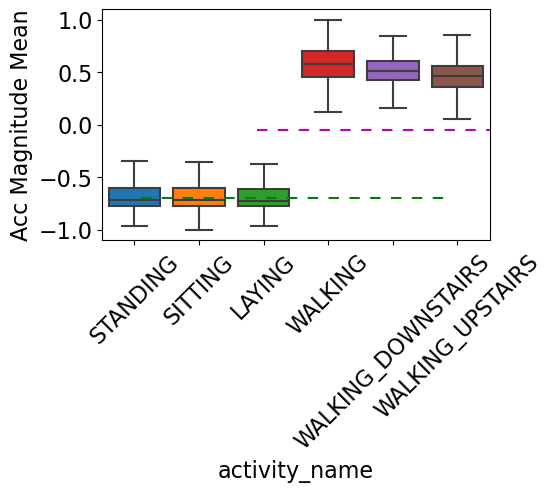

In [99]:
plt.figure(figsize=(5,3))
sns.boxplot(x='activity_name', y='tBodyAccJerk-entropy()-Z', data=train, showfliers=False, saturation=1)
plt.ylabel('Acc Magnitude Mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')

# Rotate x-axis labels
plt.tick_params(axis='x', rotation=45)

plt.show()


#### Correlation of columns to find collinearities, dependencies etc

In [95]:
temp = train.drop(['activity_id', 'activity_name'], axis = 1)
df_corr = temp.corr()

In [104]:
top_corr_unique = df_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_unique = top_corr_unique[top_corr_unique < 1.0].head(100)
#top_corr_unique = top_corr_unique[top_corr_unique > 0.99].head(100)

print("Top 10 most correlated features:")
for (feature1, feature2), correlation in top_corr_unique.items():
    print(f"{feature1} and {feature2}: {correlation}")

Top 10 most correlated features:
tBodyAccJerk-energy()-Z and fBodyAccJerk-energy()-Z: 0.9999997552584101
fBodyAccJerk-energy()-Y and tBodyAccJerk-energy()-Y: 0.9999996705449755
tBodyAccJerk-energy()-X and fBodyAccJerk-energy()-X: 0.9999993920536718
fBodyAcc-bandsEnergy()-1,24 and fBodyAcc-energy()-X: 0.9998784309699545
fBodyGyro-energy()-X and fBodyGyro-bandsEnergy()-1,24: 0.99976657018449
fBodyAcc-bandsEnergy()-1,24n and fBodyAcc-energy()-Y: 0.9996610821845465
tBodyAccJerkMag-mean() and tBodyAccJerk-sma(): 0.9996564183379197
tBodyAcc-energy()-X and fBodyAcc-energy()-X: 0.9996112814198883
fBodyGyro-bandsEnergy()-1,24nn and fBodyGyro-energy()-Z: 0.9995234782947701
fBodyAcc-bandsEnergy()-1,24 and tBodyAcc-energy()-X: 0.9995072102052956
fBodyGyro-energy()-Y and tBodyGyro-energy()-Y: 0.9992417512209286
tBodyGyroMag-mean() and tBodyGyro-sma(): 0.9992343307812228
tBodyAcc-sma() and tGravityAccMag-mean(): 0.9991106309234037
fBodyAcc-bandsEnergy()-1,24 and fBodyAcc-bandsEnergy()-1,16: 0.998972

#### Acceleration analysis

In [106]:
# process feature name for simplicity

parentheses_pattern = re.compile(r'[\(\)]')
hyphen_pattern = re.compile(r'[-]')
comma_pattern = re.compile(r',')

# Apply the regular expressions to remove the specified characters from column names
train.columns = [parentheses_pattern.sub('', col) for col in train.columns]
train.columns = [hyphen_pattern.sub('', col) for col in train.columns]
train.columns = [comma_pattern.sub('', col) for col in train.columns]

test.columns = [parentheses_pattern.sub('', col) for col in test.columns]
test.columns = [hyphen_pattern.sub('', col) for col in test.columns]
test.columns = [comma_pattern.sub('', col) for col in test.columns]

# Print the modified column names of the test DataFrame
print(test.columns)

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject_id', 'activity_id', 'activity_name'],
      dtype='object', length=564)


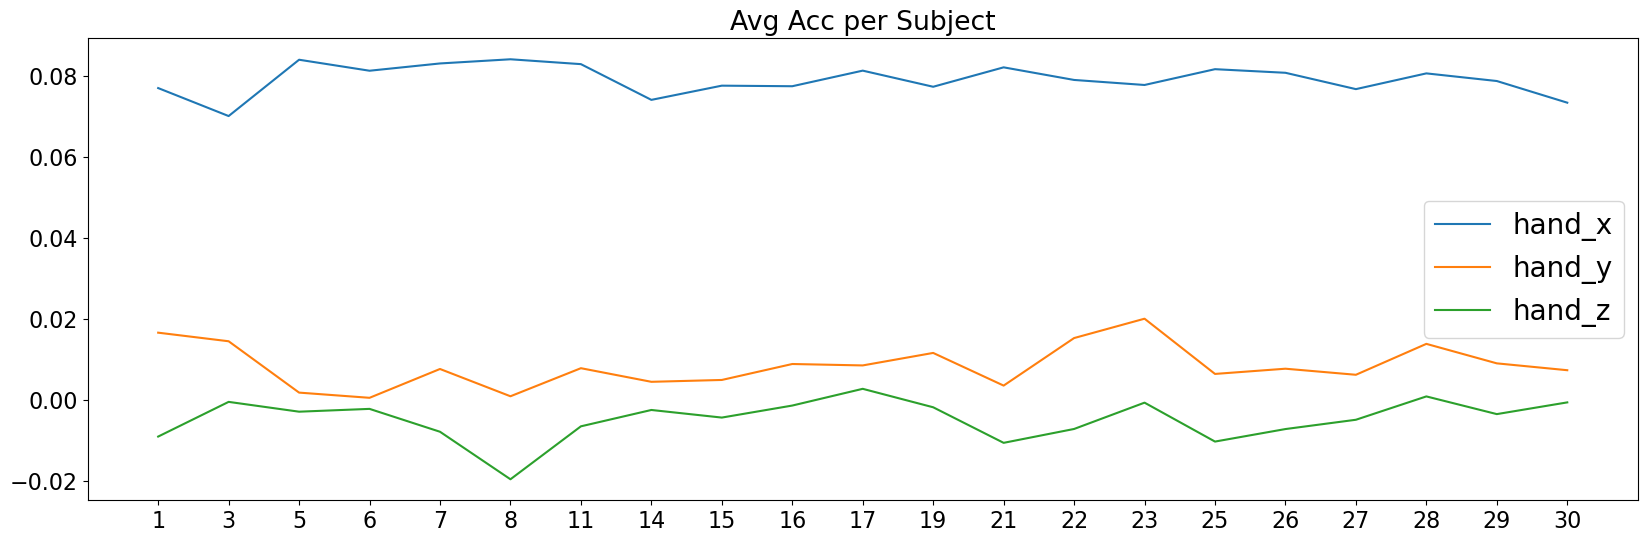

In [107]:
result_id = train.drop(['activity_name', 'activity_id'], axis=1).groupby(['subject_id']).mean().reset_index()
samples = pd.DataFrame()
samples['hand_x'] = result_id['tBodyAccJerkmeanX']
samples['hand_y'] = result_id['tBodyAccJerkmeanY']
samples['hand_z'] = result_id['tBodyAccJerkmeanZ']
ax = samples.plot(kind='line', figsize=(20,6), title='Avg Acc per Subject')
ax.set_xticks(np.arange(len(samples)))
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples)))

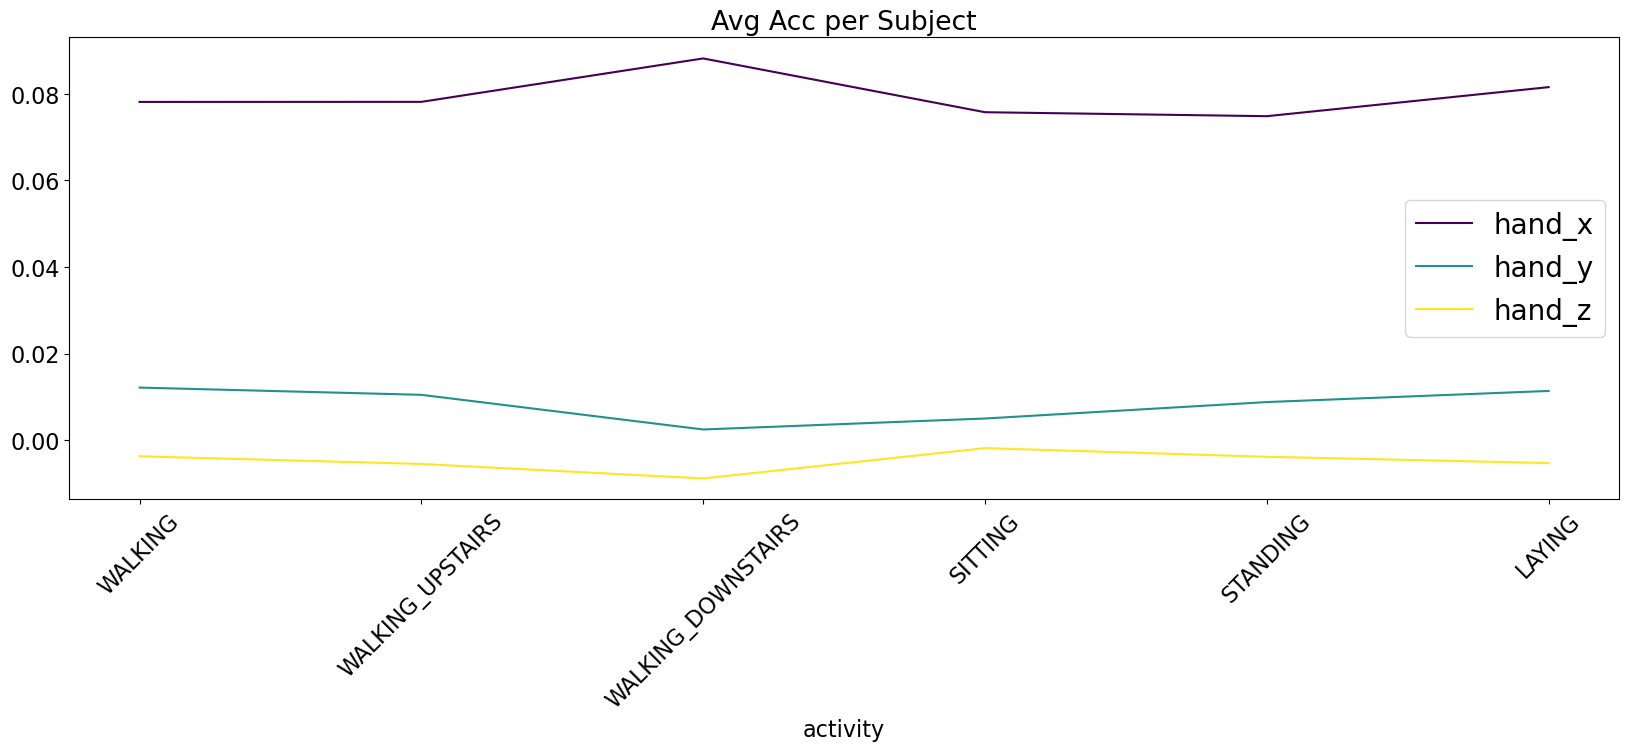

In [108]:
result_id = train.drop(['activity_name'], axis=1).groupby(['activity_id']).mean().reset_index()

samples = pd.DataFrame()
samples['hand_x'] = result_id['tBodyAccJerkmeanX']
samples['hand_y'] = result_id['tBodyAccJerkmeanY']
samples['hand_z'] = result_id['tBodyAccJerkmeanZ']
samples['activity'] = result_id['activity_id']

activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 
                    4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

# Map numerical activity labels to activity names
samples['activity'] = samples['activity'].map(activity_mapping)

ax = samples.plot(kind='line', x='activity', figsize=(20,6), title='Avg Acc per Subject', colormap='viridis')
b = ax.legend(fontsize=20)
c = ax.set_xticks(np.arange(len(samples)))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### - Dataset 3: MHEALTH: 

In [109]:
df_mhealth = pd.DataFrame()
activity_mapping = {0: 'NO_ACTIVITY', 1: 'STANDING', 2: 'SITTING', 3: 'LAYING', \
                    4: 'WALKING', 5: 'WALKING_UPSTAIRS', 6: 'WAIST_BEND_FORWARD',\
                    7: 'FRONTAL_ARMS', 8: 'KNEE_BEND', 9: 'CYCLING', \
                    10: 'JOGGING', 11: 'RUNNING', 12: 'JUMP'}

In [112]:
for i in range(1, 11):
    df_s = pd.read_csv(f'./mhealth+dataset/MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
    df_s = df_s.loc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]].rename(columns= {
        0: 'acc_ch_x', 
        1: 'acc_ch_y', 
        2: 'acc_ch_z',
        3: 'ecg_sig_1',
        4: 'ecg_sig_2',
        5: 'acc_la_x', 
        6: 'acc_la_y', 
        7: 'acc_la_z', 
        8: 'gyr_la_x',
        9: 'gyr_la_y', 
        10: 'gyr_la_z', 
        11: 'mag_la_x', 
        12: 'mag_la_y', 
        13: 'mag_la_z', 
        14: 'acc_rw_x', 
        15: 'acc_rw_y',
        16: 'acc_rw_z', 
        17: 'gyr_rw_x', 
        18: 'gyr_rw_y', 
        19: 'gyr_rw_z', 
        20: 'mag_rw_x', 
        21: 'mag_rw_y', 
        22: 'mag_rw_z',
        23: 'activity'
    })
    df_s['subject'] = f'subject{i}'
    df_mhealth = pd.concat([df_mhealth, df_s])
    
df_mhealth.rename(columns = {'subject': 'subject_id'}, inplace = True)
df_mhealth.rename(columns = {'activity': 'activity_id'}, inplace = True)
df_mhealth['activity_name'] = df_mhealth['activity_id'].map(activity_mapping)

In [113]:
df_mhealth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1215745 entries, 0 to 98303
Data columns (total 26 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   acc_ch_x       1215745 non-null  float64
 1   acc_ch_y       1215745 non-null  float64
 2   acc_ch_z       1215745 non-null  float64
 3   ecg_sig_1      1215745 non-null  float64
 4   ecg_sig_2      1215745 non-null  float64
 5   acc_la_x       1215745 non-null  float64
 6   acc_la_y       1215745 non-null  float64
 7   acc_la_z       1215745 non-null  float64
 8   gyr_la_x       1215745 non-null  float64
 9   gyr_la_y       1215745 non-null  float64
 10  gyr_la_z       1215745 non-null  float64
 11  mag_la_x       1215745 non-null  float64
 12  mag_la_y       1215745 non-null  float64
 13  mag_la_z       1215745 non-null  float64
 14  acc_rw_x       1215745 non-null  float64
 15  acc_rw_y       1215745 non-null  float64
 16  acc_rw_z       1215745 non-null  float64
 17  gyr_rw_x       

#### Some Dataset stats

In [114]:
print('Df shape', df_mhealth.shape)
print('Total columns', len(df_mhealth.columns))
print('No of subjects', len(df_mhealth.drop(['activity_name'], axis = 1).groupby(['subject_id']).mean().reset_index()))

Df shape (1215745, 26)
Total columns 26
No of subjects 10


#### Subject distribution - can be used in Data Segmentation/Hypotheses etc

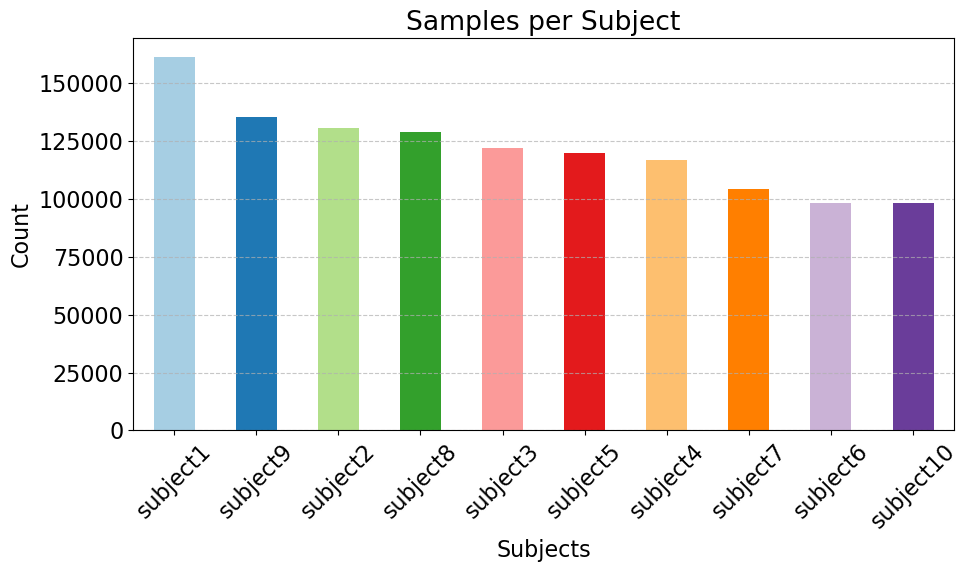

In [115]:
subject_counts = df_mhealth['subject_id'].value_counts()

num_subjects = len(subject_counts)
colors = plt.cm.Paired(range(num_subjects))
plt.figure(figsize=(10, 6)) 
subject_counts.plot(kind='bar', color=colors) 
plt.title('Samples per Subject')
plt.xlabel('Subjects')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

In [116]:
max_subject = subject_counts.idxmax()
max_count = subject_counts.max()
print(f"Subject {max_subject} has {max_count}")

min_subject = subject_counts.idxmin()
min_count = subject_counts.min()
print(f"Subject {min_subject} has {min_count}")

Subject subject1 has 161280
Subject subject6 has 98304


#### Activity distribution:
##### Clearly, NULL activity 0 is heavily represented in the data. Should be resampled to a number of occurences close to the other classes, which are comparable in representation.

In [118]:
activity_counts

activity_id
NO_ACTIVITY           872550
STANDING               30720
SITTING                30720
LAYING                 30720
WALKING                30720
CYCLING                30720
JOGGING                30720
RUNNING                30720
WALKING_UPSTAIRS       30720
FRONTAL_ARMS           29441
KNEE_BEND              29337
WAIST_BEND_FORWARD     28315
JUMP                   10342
Name: count, dtype: int64

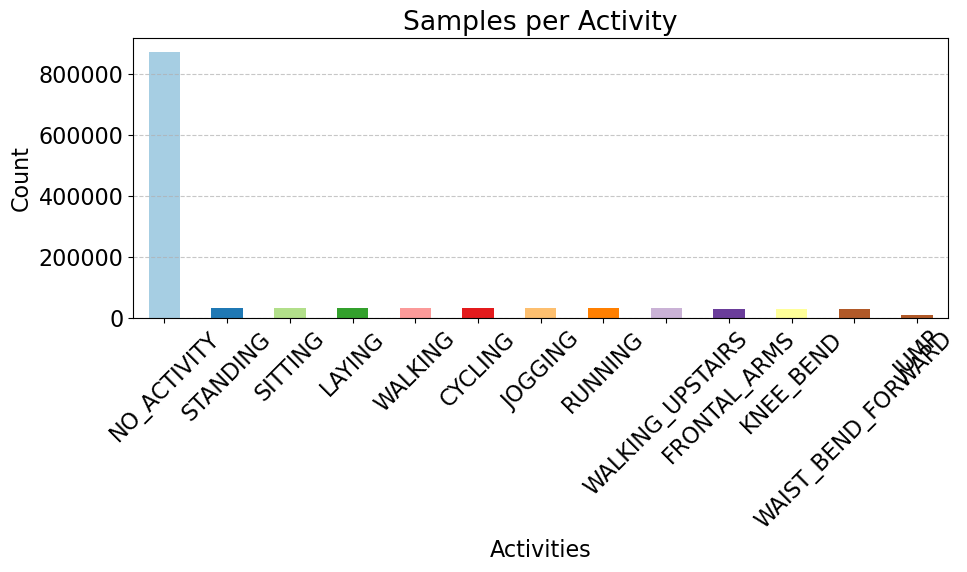

In [117]:
activity_counts = df_mhealth['activity_id'].map(activity_mapping).value_counts()

# Determine the number of unique activities
num_activities = len(activity_counts)

colors = plt.cm.Paired(range(num_activities))

# Now, we can create a bar plot using matplotlib with the specified colors
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
activity_counts.plot(kind='bar', color=colors)
plt.title('Samples per Activity')
plt.xlabel('Activities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [119]:
#save for comparison purposes
df_before = df_mhealth.copy()

#resampling
null_act = df_mhealth[df_mhealth['activity_id'] == 0]
other_act = df_mhealth[df_mhealth['activity_id'] != 0]
num_samples_per_subject = 30720 // len(df_mhealth['subject_id'].unique())

resampled_null_act = pd.concat([
    null_act[null_act['subject_id'] == subject_id].sample(n=num_samples_per_subject, replace=True, random_state=1)
    for subject_id in df_mhealth['subject_id'].unique()
])

df_mhealth = pd.concat([resampled_null_act, other_act])
df_mhealth['activity_id'].value_counts()

activity_id
0     30720
1     30720
2     30720
3     30720
4     30720
9     30720
10    30720
11    30720
5     30720
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

#### Visual Representation of Activities per Subject: Before & After Resamping

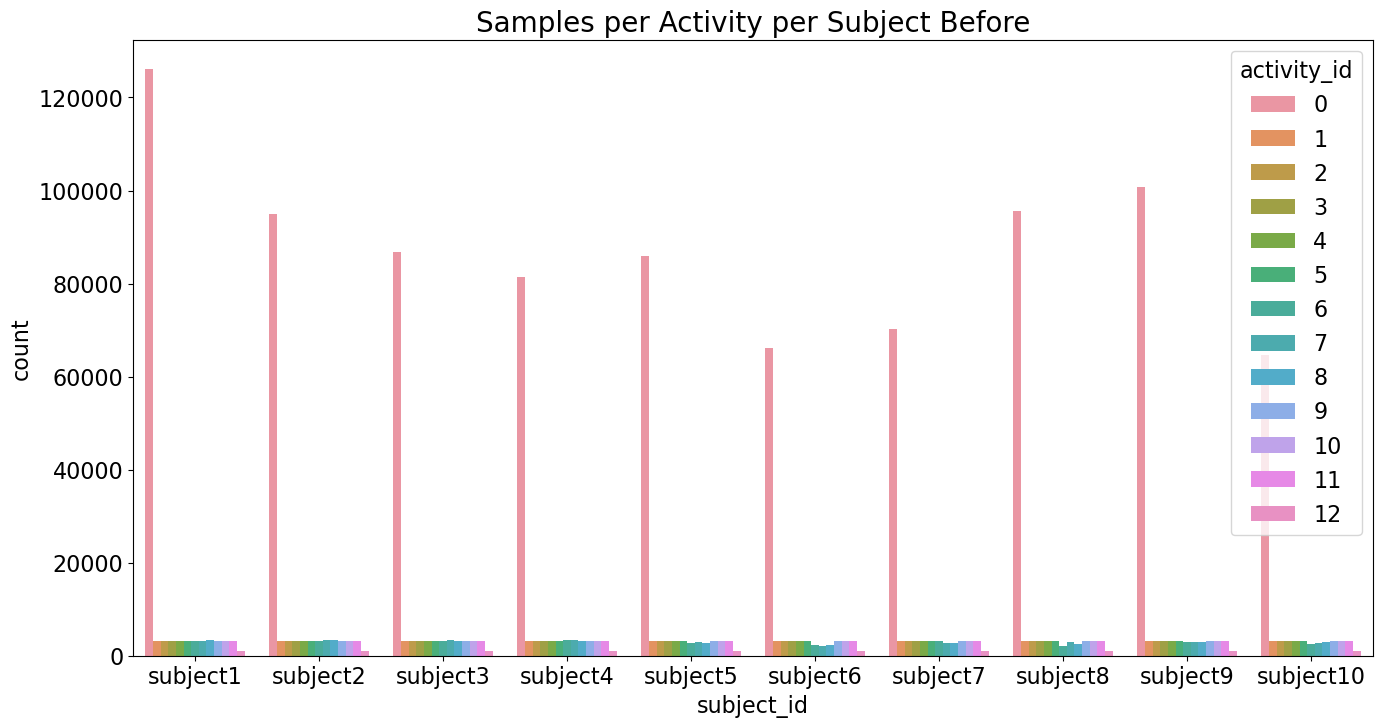

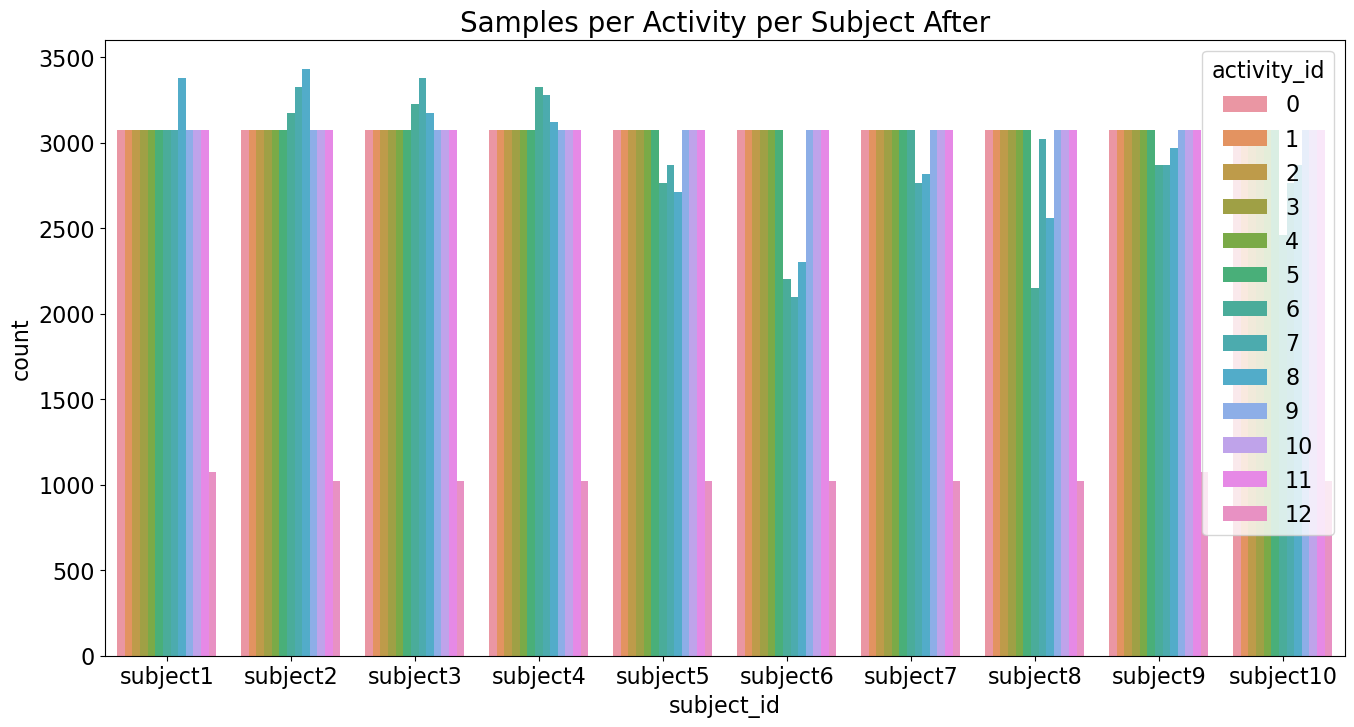

In [120]:
plt.figure(figsize=(16,8))
plt.title('Samples per Activity per Subject Before', fontsize=20)
sns.countplot(x='subject_id',hue='activity_id', data = df_before)
plt.show()

plt.figure(figsize=(16,8))
plt.title('Samples per Activity per Subject After', fontsize=20)
sns.countplot(x='subject_id',hue='activity_id', data = df_mhealth)
plt.show()

#### Acceleration analysis

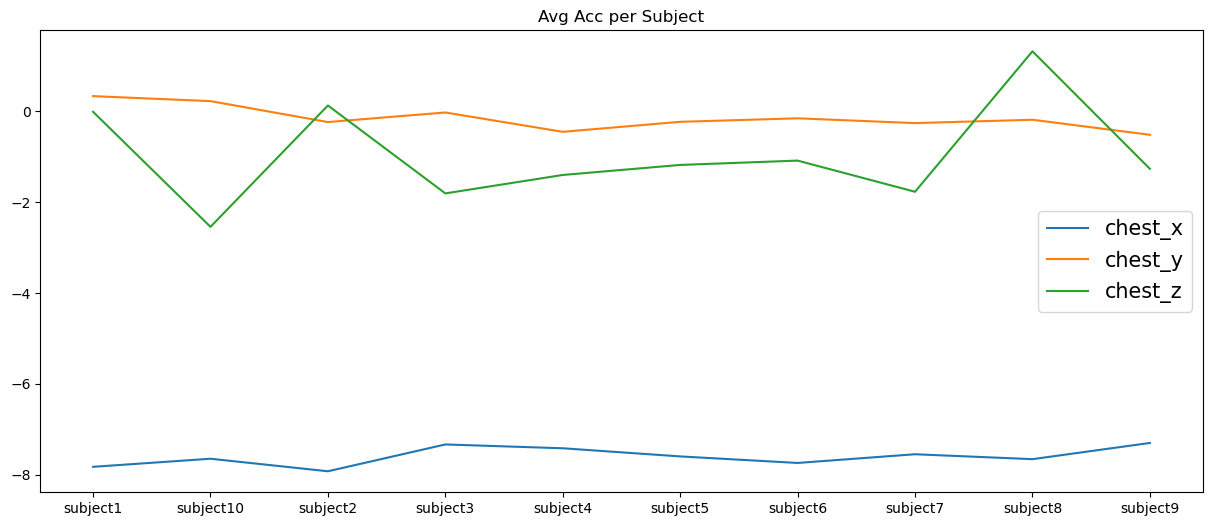

In [41]:
result_id = df_mhealth.drop(['activity_id','activity_name'], axis=1).groupby(['subject_id']).mean().reset_index()
samples = pd.DataFrame()
samples['chest_x'] = result_id['acc_ch_x']
samples['chest_y'] = result_id['acc_ch_y']
samples['chest_z'] = result_id['acc_ch_z']
ax = samples.plot(kind='line', figsize=(15,6), title='Avg Acc per Subject')
ax.set_xticks(np.arange(len(samples)))
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 15)
c = ax.set_xticks(np.arange(len(samples)))

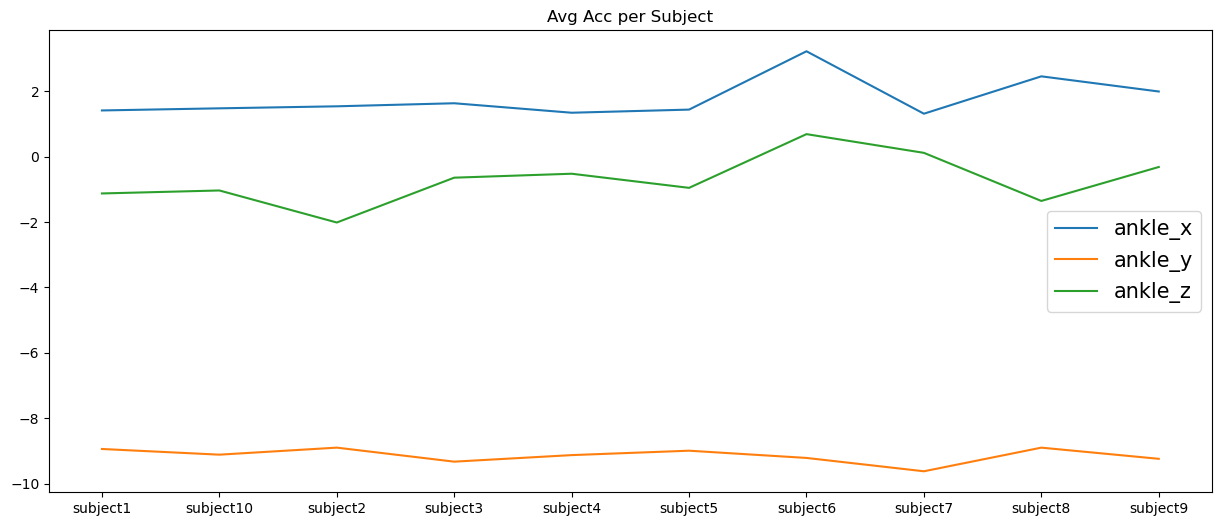

In [42]:
result_id = df_mhealth.drop(['activity_id','activity_name'], axis=1).groupby(['subject_id']).mean().reset_index()
samples = pd.DataFrame()
samples['ankle_x'] = result_id['acc_la_x']
samples['ankle_y'] = result_id['acc_la_y']
samples['ankle_z'] = result_id['acc_la_z']
ax = samples.plot(kind='line', figsize=(15,6), title='Avg Acc per Subject')
ax.set_xticks(np.arange(len(samples)))
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 15)
c = ax.set_xticks(np.arange(len(samples)))

#### Investigating which columns are mostly correlated with Activity

In [48]:
numerical_columns = df_mhealth.select_dtypes(include='number').columns

# Calculate Pearson correlation coefficients
correlation_results = {}
for col in numerical_columns:
    correlation_results[col] = df_mhealth[col].corr(df_mhealth['activity_id'])

# Sort the results by correlation coefficient magnitude
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top correlated columns
top_correlated_columns = sorted_correlation_results[1:10]  # Adjust the number of top correlated columns to display
for col, corr in top_correlated_columns:
    print(f"{col}: Correlation = {corr}")

acc_ch_z: Correlation = -0.3437347443485289
gyr_la_z: Correlation = -0.28189341339240886
acc_la_z: Correlation = -0.28143780625798426
acc_ch_y: Correlation = 0.18120420566639867
acc_la_y: Correlation = -0.17357851535802368
gyr_la_y: Correlation = -0.13275906850334956
acc_rw_z: Correlation = -0.11504920457440157
gyr_rw_z: Correlation = 0.07709955700927201
mag_rw_y: Correlation = 0.0754106050135653


#### Investigating the highest correlated feature acc_ch_z.
##### Most activities are separated clearly on the y-axis. However, more similar activities (eg. running, jogging) are not completely separable to less similar ones (eg. no activity). Hence, the relatively low correlation of "only" 34.3%

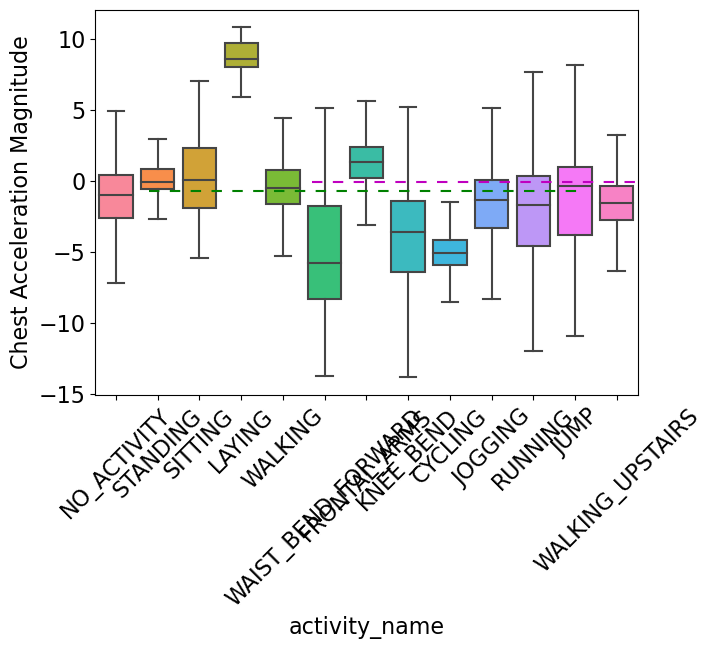

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
df_mhealth['activity_name'] = df_mhealth['activity_id'].map(activity_mapping)
sns.boxplot(x='activity_name', y='acc_ch_z', data=df_mhealth, showfliers=False, saturation=1)
plt.ylabel('Chest Acceleration Magnitude')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5, 5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5, 5), c='m')

# Rotate x-axis labels
plt.tick_params(axis='x', rotation=45)

plt.show()

#### Correlations between features

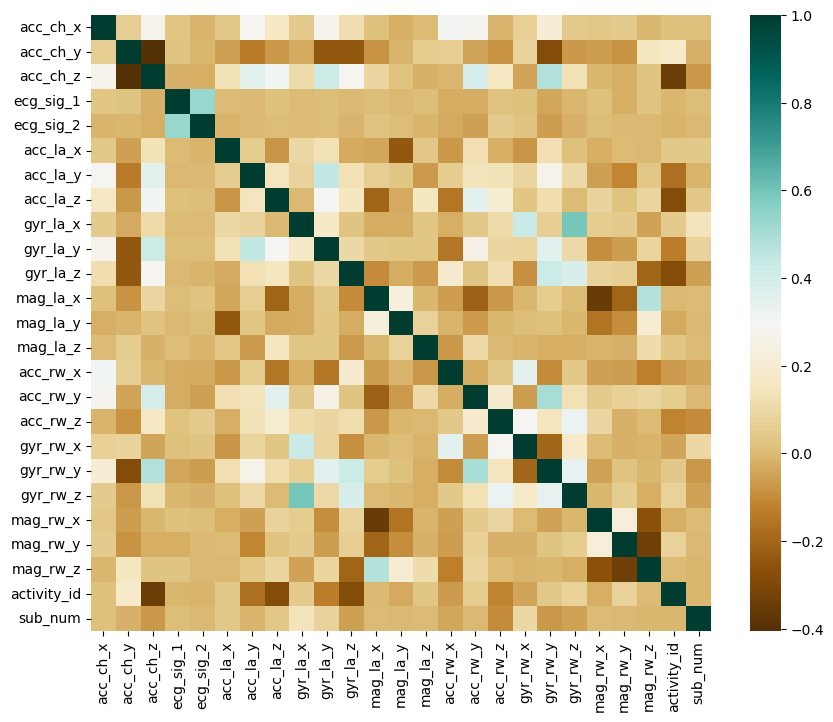

In [55]:
df_mhealth['sub_num'] = df_mhealth['subject_id'].str.extract(r'(\d+)')
df_mhealth['sub_num'] = df_mhealth['sub_num'].astype(int)
tdf = df_mhealth.drop(['subject_id', 'activity_name'], axis=1)
df_corr = tdf.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()

In [56]:
top_corr_unique = df_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_unique = top_corr_unique[top_corr_unique != 1]
top_corr_unique = top_corr_unique.head(5) 

print("Top 5 most correlated features:")
for (feature1, feature2), correlation in top_corr_unique.items():
    print(f"{feature1} and {feature2}: {correlation}")

Top 5 most correlated features:
gyr_la_x and gyr_rw_z: 0.5984557143249529
ecg_sig_1 and ecg_sig_2: 0.5332708772286381
gyr_rw_y and acc_rw_y: 0.49960387847305543
acc_ch_z and gyr_rw_y: 0.47865198733192377
mag_la_x and mag_rw_z: 0.473968422946981
